In [ ]:
# What is the dataset format to train in pytorch?
# How to create custom labelled dataset of my faces and other people's from my camera pictures?
# Can I train a CNN to recognize my faces from the rest?
# How to run a camera and run detect my face realtime?

In [1]:
import torch
import torch.nn as nn
import torchvision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torchvision.__version__)

0.16.1+cu121


# MAKING MY OWN DATASET

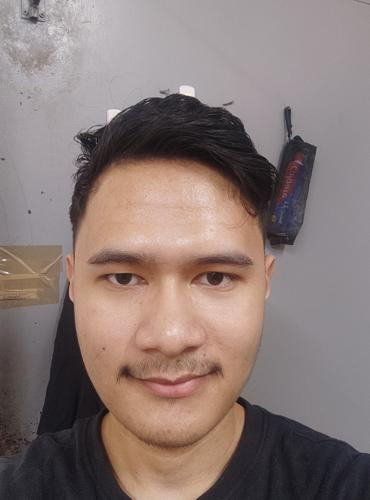

In [ ]:
from IPython.display import display,Image # way to display images in python
#from PIL import Image # way to process images in python
# location in /format

display(Image('C:/Users/BLAZE/Desktop/PyTorch/Mini Project/faces_original/bishal/bishal (1).jpg')) # for IPython
# display(Image.open('C:/Users/BLAZE/Desktop/PyTorch/Mini Project/datasets/bishal/bishal1-370x500.jpg')) # for PIL

In [ ]:
from PIL import Image
from IPython.display import display
import numpy as np
import sys
import os
import csv
# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    labels = []
    names = []
    keywords = {"bishal" : "1","unknown": "0",} # keys and values to be changed as needed
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
#                 print(fullName)
#                 display(Image.open(fullName))
                fileList.append(fullName)
            for keyword in keywords:
                if keyword in name:
                    labels.append(keywords[keyword])
                else:
                    continue
#             print(labels)
            names.append(name)
#     print(names)
    return fileList, labels, names # fileList = directory



# Load Image
myFileList, labels, names  = createFileList('C:/Users/BLAZE/Desktop/PyTorch/Mini Project/datasets/')

# print(myFileList,labels,names)
i = 0
for file in myFileList:
    print(f"Filename {file}")
    # get original image parameters...
    img_file = Image.open(file)
    # img_file.show()
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode
    
    
# Make image Greyscale
    # img_grey = img_file.convert('L')
    img_grey = img_file.convert('L')# replace L with RGB
    display(img_grey)
#     img_grey.save('result.png')
#     img_grey.show()
    
    
# Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=int).reshape((width, height))
    # value = np.asarray(img_grey.getdata(), dtype=int).reshape((width, height,3))
    display(f"This image/value has {len(value)} widths/rows")
    for item in value:
        display(f"Each width/rows has {len(item)} sub_heights/columns i.e. {item} and each value is a pixel value")
    
    value = value.flatten()
    print(value)
#    flatten() 
    
    value = np.append(value,labels[i])
    i +=1
#     print(len(value)) # its 185,000 # 16,384 columns is capacity of excel
    display(value)
#     with open("faces.csv", 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(value)

In [ ]:
# pip install opencv-python

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
dataset_path = 'faces.csv'
image_size=(54,40) #add 3 if RGB image
 
def load():
    data = pd.read_csv(dataset_path)
    pixels = data['Pixels'].tolist()
    width, height= 40, 54# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height) #add depth if RGB image
        a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A
 
faces,A = load()
plt.imshow(A[0].astype("uint8"))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('faces.csv')

# Function to display an image given the flattened pixels and label
def display_image(flattened_pixels, label):
    # Reshape the flattened pixel array to a 40x54 image
    image = np.array(flattened_pixels.split(' '), dtype='uint8').reshape((54, 40))
    print(image)
    
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# Iterate over the DataFrame rows and display each image
for index, row in df.iterrows(): #index is not really used. just kept for return value of df.iterrows()
#     print(index,row['Pixels'],row['Labels'])
    display_image(row['Pixels'], row['Labels'])


In [ ]:
# CNN MODIFIED
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class FaceCNN(nn.Module):
#     def __init__(self):
#         super(FaceCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#         self.fc1 = nn.Linear(128 * 28 * 28, 512)
#         self.fc2 = nn.Linear(512, 2)  # 2 classes: face and non-face
    
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1, 128 * 28 * 28)  # flatten
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [ ]:
# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 10 * 13, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 10 * 13)
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# MY PROJECT MODEL

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms

# Custom dataset class
class FacesDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.df = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        pixels = np.array(self.df.iloc[idx, 1].split(), dtype='float32').reshape(54, 40) / 255.0
        label = int(self.df.iloc[idx, 0])
        sample = {'image': pixels, 'label': label}
        
        if self.transform:
            sample['image'] = self.transform(sample['image'])
        
        return sample

In [5]:
# Transform to convert numpy array to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset
dataset = FacesDataset(csv_file='faces.csv', transform=transform)

In [6]:
# Split the dataset into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [7]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 10 * 13, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 10 * 13)
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [9]:
# Instantiate the model, define the loss function and the optimizer
model = CNNModel()
# model = FaceCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch['image'], batch['label'].float()
#         inputs = inputs.unsqueeze(1)  # Add channel dimension
        display(inputs)
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

tensor([[[[0.9961, 0.9961, 0.9961,  ..., 0.7647, 0.7569, 0.7529],
          [0.9961, 0.9961, 0.9961,  ..., 0.7529, 0.7451, 0.7412],
          [0.9922, 0.9961, 0.9961,  ..., 0.7490, 0.7451, 0.7451],
          ...,
          [0.3059, 0.3608, 0.3765,  ..., 0.1765, 0.1725, 0.1725],
          [0.3137, 0.3294, 0.3490,  ..., 0.1804, 0.1804, 0.1843],
          [0.2941, 0.2745, 0.2824,  ..., 0.1843, 0.1882, 0.1882]]],


        [[[0.9725, 0.8706, 0.7412,  ..., 0.9137, 0.9059, 0.9020],
          [0.9922, 0.9255, 0.7804,  ..., 0.9020, 0.8980, 0.8941],
          [0.9961, 0.9961, 0.9137,  ..., 0.9020, 0.8980, 0.8980],
          ...,
          [0.7608, 0.7882, 0.8706,  ..., 0.7412, 0.7961, 0.8549],
          [0.7765, 0.7882, 0.8745,  ..., 0.7490, 0.7882, 0.8392],
          [0.7843, 0.7804, 0.8824,  ..., 0.7647, 0.7882, 0.8157]]],


        [[[0.9451, 0.9529, 0.9725,  ..., 0.5647, 0.5529, 0.5451],
          [0.9373, 0.9490, 0.9686,  ..., 0.5608, 0.5490, 0.5373],
          [0.9255, 0.9373, 0.9569,  ..

tensor([[[[0.7490, 0.7490, 0.7490,  ..., 0.9176, 0.9333, 0.9451],
          [0.7608, 0.7569, 0.7569,  ..., 0.9176, 0.9294, 0.9412],
          [0.7725, 0.7725, 0.7725,  ..., 0.9137, 0.9255, 0.9373],
          ...,
          [0.4510, 0.4471, 0.4000,  ..., 0.5529, 0.4745, 0.4471],
          [0.4706, 0.4510, 0.4039,  ..., 0.6745, 0.6980, 0.7176],
          [0.4549, 0.4392, 0.4157,  ..., 0.3176, 0.3333, 0.3608]]],


        [[[0.7412, 0.6471, 0.6706,  ..., 0.8118, 0.9961, 0.9686],
          [0.7608, 0.6863, 0.6824,  ..., 0.7725, 0.9961, 0.9843],
          [0.7922, 0.7608, 0.6941,  ..., 0.7882, 0.9961, 0.9961],
          ...,
          [0.2667, 0.5373, 0.5451,  ..., 0.3922, 0.3961, 0.3922],
          [0.3647, 0.5804, 0.4980,  ..., 0.3647, 0.3961, 0.3725],
          [0.4510, 0.5765, 0.4745,  ..., 0.3569, 0.3882, 0.3529]]],


        [[[0.7569, 0.7569, 0.7608,  ..., 0.9922, 0.9961, 0.9922],
          [0.7569, 0.7569, 0.7608,  ..., 0.9961, 0.9961, 0.9961],
          [0.7569, 0.7608, 0.7647,  ..

tensor([[[[0.6431, 0.6353, 0.6039,  ..., 0.6471, 0.6314, 0.6118],
          [0.6471, 0.6431, 0.6078,  ..., 0.6471, 0.6314, 0.6157],
          [0.6549, 0.6510, 0.6118,  ..., 0.6431, 0.6314, 0.6196],
          ...,
          [0.8549, 0.8549, 0.8667,  ..., 0.5059, 0.6471, 0.8471],
          [0.8275, 0.8353, 0.8588,  ..., 0.4353, 0.3725, 0.4980],
          [0.7608, 0.7765, 0.8157,  ..., 0.4706, 0.3804, 0.4235]]],


        [[[0.5843, 0.6745, 0.6745,  ..., 0.9843, 0.9490, 0.9686],
          [0.6588, 0.7608, 0.7216,  ..., 0.9882, 0.9686, 0.9804],
          [0.6196, 0.7412, 0.6824,  ..., 0.9922, 0.9765, 0.9804],
          ...,
          [0.2078, 0.4667, 0.5804,  ..., 0.3843, 0.4157, 0.4392],
          [0.3098, 0.5490, 0.5569,  ..., 0.4078, 0.4588, 0.4431],
          [0.4157, 0.5922, 0.5176,  ..., 0.4118, 0.4667, 0.4157]]],


        [[[0.8314, 0.7020, 0.6471,  ..., 0.7294, 0.9255, 1.0000],
          [0.8275, 0.7294, 0.6824,  ..., 0.7412, 0.9294, 1.0000],
          [0.8392, 0.7843, 0.7333,  ..

tensor([[[[0.7294, 0.6902, 0.6196,  ..., 0.8353, 1.0000, 0.9882],
          [0.7647, 0.7373, 0.6235,  ..., 0.8392, 1.0000, 0.9765],
          [0.7843, 0.7765, 0.6157,  ..., 0.8431, 1.0000, 0.9882],
          ...,
          [0.1961, 0.4118, 0.4980,  ..., 0.3843, 0.3647, 0.3922],
          [0.2784, 0.4549, 0.4627,  ..., 0.3804, 0.3608, 0.3804],
          [0.3529, 0.4667, 0.4275,  ..., 0.3843, 0.3647, 0.3765]]],


        [[[0.7490, 0.7333, 0.7137,  ..., 0.8157, 0.8118, 0.8078],
          [0.7412, 0.7294, 0.7176,  ..., 0.8078, 0.8078, 0.8118],
          [0.7529, 0.7529, 0.7412,  ..., 0.8078, 0.8157, 0.8196],
          ...,
          [0.2510, 0.2706, 0.2941,  ..., 0.3020, 0.4353, 0.6157],
          [0.2353, 0.2627, 0.2784,  ..., 0.2510, 0.2627, 0.3490],
          [0.2667, 0.2706, 0.2588,  ..., 0.2314, 0.2510, 0.3255]]],


        [[[0.8863, 0.8941, 0.8784,  ..., 0.7882, 0.7490, 0.7137],
          [0.8745, 0.8784, 0.8745,  ..., 0.7725, 0.7412, 0.7137],
          [0.8667, 0.8627, 0.8667,  ..

tensor([[[[0.6471, 0.6471, 0.6471,  ..., 0.6353, 0.6745, 0.7098],
          [0.6471, 0.6471, 0.6510,  ..., 0.7098, 0.7098, 0.7098],
          [0.6510, 0.6510, 0.6510,  ..., 0.7373, 0.7059, 0.6784],
          ...,
          [0.1569, 0.1765, 0.1647,  ..., 0.1725, 0.1882, 0.2078],
          [0.1608, 0.1725, 0.1647,  ..., 0.1765, 0.1843, 0.1961],
          [0.1647, 0.1725, 0.1647,  ..., 0.1843, 0.1804, 0.1882]]],


        [[[0.6157, 0.6588, 0.5373,  ..., 0.0902, 0.0941, 0.0980],
          [0.6000, 0.6549, 0.5490,  ..., 0.0902, 0.0941, 0.0941],
          [0.6000, 0.6588, 0.5608,  ..., 0.0902, 0.0941, 0.0941],
          ...,
          [0.6353, 0.6078, 0.6235,  ..., 0.8039, 0.8000, 0.7961],
          [0.6078, 0.5961, 0.6078,  ..., 0.7961, 0.7961, 0.7922],
          [0.6000, 0.6039, 0.6039,  ..., 0.7961, 0.7922, 0.7922]]],


        [[[0.7176, 0.7137, 0.7098,  ..., 0.8118, 0.8196, 0.8275],
          [0.7255, 0.7216, 0.7216,  ..., 0.8157, 0.8275, 0.8314],
          [0.7373, 0.7333, 0.7294,  ..

tensor([[[[0.5137, 0.5137, 0.5098,  ..., 0.6549, 0.7922, 0.8941],
          [0.5255, 0.5255, 0.5216,  ..., 0.6980, 0.8118, 0.8941],
          [0.5451, 0.5451, 0.5412,  ..., 0.7490, 0.8353, 0.8863],
          ...,
          [0.4588, 0.4824, 0.6039,  ..., 0.5412, 0.5490, 0.6824],
          [0.5412, 0.5647, 0.6118,  ..., 0.5333, 0.5059, 0.6157],
          [0.6039, 0.6431, 0.6118,  ..., 0.5373, 0.4980, 0.5608]]],


        [[[0.7569, 0.7608, 0.7647,  ..., 0.9725, 0.9882, 0.9922],
          [0.7569, 0.7608, 0.7686,  ..., 0.9725, 0.9882, 0.9882],
          [0.7529, 0.7569, 0.7647,  ..., 0.9725, 0.9843, 0.9882],
          ...,
          [0.5255, 0.5333, 0.5412,  ..., 0.4039, 0.4118, 0.4510],
          [0.5098, 0.5216, 0.5333,  ..., 0.3961, 0.4196, 0.4392],
          [0.5098, 0.5176, 0.5294,  ..., 0.3882, 0.4235, 0.4275]]],


        [[[0.8784, 0.8510, 0.5843,  ..., 0.1294, 0.1647, 0.1804],
          [0.8235, 0.8784, 0.3255,  ..., 0.1294, 0.1569, 0.1725],
          [0.8588, 0.7333, 0.1529,  ..

tensor([[[[0.6118, 0.6039, 0.5804,  ..., 0.8314, 0.8314, 0.8314],
          [0.5804, 0.6118, 0.6353,  ..., 0.8314, 0.8314, 0.8314],
          [0.6157, 0.6235, 0.6353,  ..., 0.8314, 0.8314, 0.8314],
          ...,
          [0.7647, 0.6902, 0.5882,  ..., 0.5569, 0.5725, 0.5843],
          [0.3176, 0.2510, 0.1843,  ..., 0.5373, 0.5686, 0.5725],
          [0.1804, 0.1804, 0.1647,  ..., 0.4627, 0.5490, 0.5725]]],


        [[[0.6235, 0.6275, 0.6275,  ..., 0.8471, 0.8471, 0.8431],
          [0.6392, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8431],
          [0.6588, 0.6588, 0.6588,  ..., 0.8471, 0.8471, 0.8431],
          ...,
          [0.1529, 0.1765, 0.1725,  ..., 0.6471, 0.6745, 0.7294],
          [0.0784, 0.1098, 0.1137,  ..., 0.6353, 0.6667, 0.6745],
          [0.1647, 0.1686, 0.1490,  ..., 0.4863, 0.6157, 0.6824]]],


        [[[0.8196, 0.8431, 0.8157,  ..., 0.9922, 0.9882, 0.9961],
          [0.8157, 0.8353, 0.8235,  ..., 0.9882, 0.9686, 0.9961],
          [0.8235, 0.8275, 0.8314,  ..

tensor([[[[0.4471, 0.4510, 0.4588,  ..., 0.6157, 0.6078, 0.6039],
          [0.4510, 0.4549, 0.4588,  ..., 0.6078, 0.6039, 0.6000],
          [0.4510, 0.4549, 0.4627,  ..., 0.5961, 0.5922, 0.5882],
          ...,
          [0.2745, 0.2706, 0.2510,  ..., 0.0588, 0.0588, 0.0588],
          [0.2353, 0.2392, 0.2039,  ..., 0.0588, 0.0588, 0.0588],
          [0.2353, 0.2431, 0.2000,  ..., 0.0588, 0.0588, 0.0588]]],


        [[[0.7608, 0.7137, 0.7451,  ..., 0.6235, 0.6510, 0.6314],
          [0.7020, 0.7098, 0.7412,  ..., 0.5804, 0.6235, 0.6157],
          [0.5020, 0.5569, 0.5804,  ..., 0.6078, 0.6980, 0.7176],
          ...,
          [0.5333, 0.5961, 0.6627,  ..., 0.6824, 0.6941, 0.7255],
          [0.6118, 0.6196, 0.6157,  ..., 0.6824, 0.6745, 0.6863],
          [0.5137, 0.5412, 0.5686,  ..., 0.6863, 0.6667, 0.6627]]],


        [[[0.9922, 1.0000, 1.0000,  ..., 0.4549, 0.3804, 0.4235],
          [1.0000, 1.0000, 1.0000,  ..., 0.4314, 0.4235, 0.4000],
          [1.0000, 0.9961, 0.9882,  ..

tensor([[[[0.9569, 0.9333, 0.9020,  ..., 0.5804, 0.5529, 0.5020],
          [0.9569, 0.9412, 0.9137,  ..., 0.5176, 0.5216, 0.5176],
          [0.9686, 0.9529, 0.9294,  ..., 0.5176, 0.5255, 0.5294],
          ...,
          [0.4980, 0.5059, 0.5059,  ..., 0.3765, 0.3725, 0.3765],
          [0.4941, 0.5059, 0.5137,  ..., 0.3804, 0.3765, 0.3804],
          [0.4863, 0.4941, 0.4980,  ..., 0.3804, 0.3804, 0.3804]]],


        [[[0.6549, 0.6549, 0.6549,  ..., 0.7373, 0.7137, 0.6980],
          [0.6549, 0.6549, 0.6549,  ..., 0.7765, 0.7804, 0.7804],
          [0.6510, 0.6510, 0.6510,  ..., 0.8275, 0.8314, 0.8314],
          ...,
          [0.4000, 0.5882, 0.6627,  ..., 0.4863, 0.5098, 0.5255],
          [0.4039, 0.4980, 0.6588,  ..., 0.5216, 0.4902, 0.4824],
          [0.4667, 0.5059, 0.6784,  ..., 0.6863, 0.6039, 0.5490]]],


        [[[0.6314, 0.6235, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6627, 0.6510, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6784, 0.6824, 0.6667,  ..

tensor([[[[0.8824, 0.8941, 0.8863,  ..., 0.7216, 0.7176, 0.7098],
          [0.8980, 0.9059, 0.8941,  ..., 0.7294, 0.7216, 0.7216],
          [1.0000, 1.0000, 0.9922,  ..., 0.7373, 0.7412, 0.7451],
          ...,
          [0.5647, 0.5020, 0.4824,  ..., 0.1529, 0.1569, 0.1608],
          [0.5686, 0.4510, 0.3882,  ..., 0.1569, 0.1569, 0.1608],
          [0.5294, 0.3843, 0.3176,  ..., 0.1608, 0.1608, 0.1608]]],


        [[[0.8196, 0.8000, 0.8471,  ..., 0.4078, 0.3765, 0.4902],
          [0.8314, 0.8157, 0.8549,  ..., 0.3922, 0.3333, 0.4235],
          [0.8471, 0.8353, 0.8627,  ..., 0.3608, 0.3333, 0.4275],
          ...,
          [0.0902, 0.1059, 0.1686,  ..., 0.1020, 0.1216, 0.1098],
          [0.0667, 0.1020, 0.1765,  ..., 0.1059, 0.1216, 0.1098],
          [0.0784, 0.1137, 0.1843,  ..., 0.1059, 0.1216, 0.1098]]],


        [[[0.8431, 0.8471, 0.8549,  ..., 0.7294, 0.7137, 0.6902],
          [0.8471, 0.8510, 0.8588,  ..., 0.7216, 0.7412, 0.7569],
          [0.8392, 0.8431, 0.8510,  ..

tensor([[[[0.6667, 0.6667, 0.6667,  ..., 0.8235, 0.8471, 0.8392],
          [0.6706, 0.6706, 0.6706,  ..., 0.8196, 0.8627, 0.8235],
          [0.7059, 0.7059, 0.7020,  ..., 0.8235, 0.8431, 0.8471],
          ...,
          [0.8353, 0.7098, 0.5216,  ..., 0.2824, 0.4157, 0.5294],
          [0.3137, 0.2667, 0.2118,  ..., 0.1333, 0.1255, 0.1725],
          [0.2549, 0.2275, 0.2000,  ..., 0.1333, 0.0941, 0.1333]]],


        [[[0.4941, 0.5333, 0.3961,  ..., 0.3137, 0.2510, 0.3569],
          [0.4431, 0.5608, 0.4510,  ..., 0.1529, 0.1294, 0.2627],
          [0.4588, 0.5608, 0.4314,  ..., 0.1490, 0.1647, 0.3373],
          ...,
          [0.5294, 0.4941, 0.5608,  ..., 0.7490, 0.7216, 0.8235],
          [0.2784, 0.4000, 0.5608,  ..., 0.7294, 0.6667, 0.7255],
          [0.2000, 0.4196, 0.6118,  ..., 0.7255, 0.6039, 0.6118]]],


        [[[0.4314, 0.4314, 0.5569,  ..., 0.8392, 0.7882, 0.7961],
          [0.4078, 0.4235, 0.5137,  ..., 0.6588, 0.6118, 0.6627],
          [0.3961, 0.4353, 0.4745,  ..

Epoch [1/10], Loss: 0.6910


tensor([[[[0.8196, 0.7922, 0.8118,  ..., 0.9922, 0.9961, 0.9922],
          [0.8235, 0.7961, 0.8157,  ..., 0.9961, 0.9961, 0.9961],
          [0.8235, 0.8078, 0.8235,  ..., 1.0000, 0.9961, 0.9961],
          ...,
          [0.5569, 0.5922, 0.6157,  ..., 0.7137, 0.7451, 0.7490],
          [0.5961, 0.6196, 0.6235,  ..., 0.7098, 0.7255, 0.7608],
          [0.6314, 0.6471, 0.6314,  ..., 0.6667, 0.6471, 0.6980]]],


        [[[0.9961, 0.9961, 1.0000,  ..., 0.8275, 0.8078, 0.8235],
          [0.9961, 0.9961, 1.0000,  ..., 0.8078, 0.8235, 0.8314],
          [0.9922, 0.9961, 1.0000,  ..., 0.8157, 0.8588, 0.8549],
          ...,
          [0.3490, 0.5098, 0.2941,  ..., 0.1765, 0.1765, 0.2980],
          [0.4275, 0.5098, 0.2000,  ..., 0.2235, 0.1412, 0.2431],
          [0.4235, 0.4039, 0.2235,  ..., 0.2706, 0.1412, 0.1922]]],


        [[[0.9922, 0.9961, 0.9961,  ..., 0.6471, 0.6118, 0.4431],
          [0.9882, 0.9961, 0.9961,  ..., 0.6627, 0.6039, 0.4157],
          [0.9922, 0.9961, 1.0000,  ..

tensor([[[[0.9961, 0.9765, 0.7922,  ..., 0.8706, 0.8667, 0.8588],
          [0.8627, 0.9020, 0.8078,  ..., 0.8627, 0.8588, 0.8549],
          [0.6941, 0.8000, 0.8078,  ..., 0.8549, 0.8510, 0.8510],
          ...,
          [0.2078, 0.1725, 0.1843,  ..., 0.2314, 0.2353, 0.2431],
          [0.1961, 0.1725, 0.1725,  ..., 0.2431, 0.2431, 0.2431],
          [0.1804, 0.1843, 0.1725,  ..., 0.2471, 0.2431, 0.2431]]],


        [[[0.6392, 0.6471, 0.6471,  ..., 0.8392, 0.8392, 0.8392],
          [0.6588, 0.6549, 0.6471,  ..., 0.8392, 0.8392, 0.8392],
          [0.6706, 0.6627, 0.6627,  ..., 0.8392, 0.8392, 0.8392],
          ...,
          [0.3922, 0.2941, 0.2431,  ..., 0.2745, 0.3608, 0.4157],
          [0.1647, 0.1255, 0.1529,  ..., 0.1020, 0.1373, 0.1725],
          [0.2039, 0.1804, 0.2000,  ..., 0.1412, 0.1608, 0.1922]]],


        [[[0.6784, 0.6784, 0.6784,  ..., 0.6941, 0.6941, 0.6941],
          [0.6667, 0.6706, 0.6745,  ..., 0.7098, 0.7294, 0.7373],
          [0.6667, 0.6706, 0.6745,  ..

tensor([[[[0.7647, 0.7686, 0.7765,  ..., 0.9098, 0.9098, 0.9098],
          [0.7686, 0.7686, 0.7765,  ..., 0.9176, 0.9216, 0.9255],
          [0.7686, 0.7725, 0.7765,  ..., 0.9216, 0.9255, 0.9333],
          ...,
          [0.4706, 0.5059, 0.5569,  ..., 0.5333, 0.5608, 0.5765],
          [0.4471, 0.5137, 0.5098,  ..., 0.5020, 0.5333, 0.5569],
          [0.4549, 0.5176, 0.4314,  ..., 0.4745, 0.5137, 0.5373]]],


        [[[0.6549, 0.6549, 0.6549,  ..., 0.7373, 0.7137, 0.6980],
          [0.6549, 0.6549, 0.6549,  ..., 0.7765, 0.7804, 0.7804],
          [0.6510, 0.6510, 0.6510,  ..., 0.8275, 0.8314, 0.8314],
          ...,
          [0.4000, 0.5882, 0.6627,  ..., 0.4863, 0.5098, 0.5255],
          [0.4039, 0.4980, 0.6588,  ..., 0.5216, 0.4902, 0.4824],
          [0.4667, 0.5059, 0.6784,  ..., 0.6863, 0.6039, 0.5490]]],


        [[[0.9961, 0.9961, 0.9961,  ..., 0.8196, 0.7686, 0.5451],
          [0.9961, 0.9961, 0.9961,  ..., 0.8431, 0.7882, 0.5608],
          [0.9961, 0.9961, 0.9961,  ..

tensor([[[[0.6235, 0.6275, 0.6275,  ..., 0.8431, 0.8431, 0.8431],
          [0.6392, 0.6392, 0.6392,  ..., 0.8431, 0.8431, 0.8431],
          [0.6549, 0.6549, 0.6588,  ..., 0.8431, 0.8431, 0.8431],
          ...,
          [0.2314, 0.1725, 0.1765,  ..., 0.5804, 0.6196, 0.6784],
          [0.1922, 0.1529, 0.1608,  ..., 0.6157, 0.6431, 0.6314],
          [0.1373, 0.1373, 0.1765,  ..., 0.5255, 0.6235, 0.6314]]],


        [[[0.8353, 0.8275, 0.8235,  ..., 0.8980, 0.9686, 0.9647],
          [0.8392, 0.8353, 0.8353,  ..., 0.9490, 0.9961, 0.9843],
          [0.8471, 0.8392, 0.8353,  ..., 0.9843, 0.9961, 0.9961],
          ...,
          [0.4902, 0.5255, 0.6510,  ..., 0.7882, 0.7843, 0.7804],
          [0.5294, 0.6157, 0.6471,  ..., 0.8000, 0.7686, 0.7333],
          [0.5686, 0.6824, 0.6431,  ..., 0.7804, 0.7725, 0.7529]]],


        [[[0.7490, 0.7020, 0.7490,  ..., 0.8275, 0.9216, 0.8667],
          [0.7137, 0.7020, 0.7686,  ..., 0.8667, 0.8667, 0.8471],
          [0.7255, 0.7333, 0.7725,  ..

tensor([[[[0.7020, 0.7059, 0.7098,  ..., 0.9804, 0.9686, 0.9608],
          [0.7059, 0.7059, 0.7098,  ..., 0.9765, 0.9725, 0.9725],
          [0.7098, 0.7098, 0.7137,  ..., 0.9804, 0.9765, 0.9765],
          ...,
          [0.2863, 0.2353, 0.1804,  ..., 0.3961, 0.4392, 0.4196],
          [0.2941, 0.2549, 0.2039,  ..., 0.3216, 0.4275, 0.4314],
          [0.2353, 0.2118, 0.1765,  ..., 0.2392, 0.3529, 0.3608]]],


        [[[0.9686, 0.9804, 0.9686,  ..., 0.8706, 0.8667, 0.8667],
          [0.9882, 0.9882, 0.9882,  ..., 0.8784, 0.8784, 0.8784],
          [0.9373, 0.9882, 0.9882,  ..., 0.8941, 0.8941, 0.8902],
          ...,
          [0.2275, 0.2235, 0.2588,  ..., 0.7137, 0.8353, 0.9294],
          [0.2078, 0.2078, 0.2627,  ..., 0.3765, 0.5804, 0.8196],
          [0.1922, 0.2000, 0.2667,  ..., 0.2588, 0.3451, 0.5412]]],


        [[[0.8000, 0.8039, 0.8039,  ..., 0.9333, 0.9373, 0.9412],
          [0.8039, 0.8039, 0.8078,  ..., 0.9294, 0.9333, 0.9333],
          [0.8039, 0.8078, 0.8078,  ..

tensor([[[[0.5961, 0.5882, 0.5804,  ..., 0.9961, 0.9765, 1.0000],
          [0.6000, 0.5882, 0.5725,  ..., 1.0000, 1.0000, 0.9882],
          [0.5725, 0.5647, 0.5490,  ..., 1.0000, 1.0000, 0.9765],
          ...,
          [0.8902, 0.9373, 0.9176,  ..., 0.7686, 0.7725, 0.8118],
          [0.8627, 0.9176, 0.8902,  ..., 0.7137, 0.7569, 0.8118],
          [0.8431, 0.9098, 0.8941,  ..., 0.7176, 0.8235, 0.8706]]],


        [[[0.6235, 0.6745, 0.6902,  ..., 0.8196, 0.8196, 0.8353],
          [0.7059, 0.6784, 0.6627,  ..., 0.8392, 0.8314, 0.8549],
          [0.6784, 0.6863, 0.6941,  ..., 0.8549, 0.8314, 0.8627],
          ...,
          [0.2000, 0.1490, 0.1725,  ..., 0.5686, 0.6235, 0.6784],
          [0.1373, 0.1333, 0.1373,  ..., 0.3882, 0.5373, 0.6000],
          [0.0941, 0.1373, 0.1569,  ..., 0.1569, 0.2863, 0.4157]]],


        [[[0.8314, 0.8588, 0.8863,  ..., 0.4745, 0.5333, 0.5882],
          [0.8431, 0.8588, 0.8784,  ..., 0.5059, 0.6039, 0.6431],
          [0.8588, 0.8667, 0.8745,  ..

tensor([[[[0.8157, 0.8118, 0.8157,  ..., 0.7804, 0.9608, 0.9961],
          [0.8078, 0.8039, 0.8118,  ..., 0.7647, 0.9216, 0.9843],
          [0.8039, 0.8039, 0.8118,  ..., 0.7765, 0.9255, 0.9961],
          ...,
          [0.7412, 0.7725, 0.8471,  ..., 0.6431, 0.6784, 0.6745],
          [0.7098, 0.7569, 0.8353,  ..., 0.6078, 0.6039, 0.5882],
          [0.7294, 0.7569, 0.8039,  ..., 0.5922, 0.5608, 0.5412]]],


        [[[0.8706, 0.8353, 0.8392,  ..., 0.8510, 0.8471, 0.8471],
          [0.8275, 0.7922, 0.7922,  ..., 0.8627, 0.8588, 0.8588],
          [0.8745, 0.8392, 0.8196,  ..., 0.8745, 0.8706, 0.8706],
          ...,
          [0.2196, 0.2196, 0.2118,  ..., 0.6039, 0.5843, 0.5804],
          [0.2039, 0.1922, 0.1765,  ..., 0.6000, 0.5765, 0.5765],
          [0.1765, 0.1725, 0.1725,  ..., 0.5961, 0.5765, 0.5765]]],


        [[[0.4706, 0.4863, 0.5098,  ..., 0.7216, 0.7216, 0.7216],
          [0.4941, 0.5059, 0.5333,  ..., 0.7255, 0.7255, 0.7216],
          [0.4980, 0.5098, 0.5569,  ..

tensor([[[[0.7529, 0.6275, 0.7098,  ..., 0.9686, 0.9843, 0.9843],
          [0.7216, 0.6275, 0.6980,  ..., 0.9804, 0.9765, 0.9725],
          [0.7647, 0.6980, 0.7176,  ..., 0.9882, 0.9882, 0.9725],
          ...,
          [0.5098, 0.5608, 0.4510,  ..., 0.4235, 0.4196, 0.4471],
          [0.5529, 0.5451, 0.4431,  ..., 0.4471, 0.4353, 0.4039],
          [0.5451, 0.5059, 0.4314,  ..., 0.4196, 0.4118, 0.4157]]],


        [[[0.6078, 0.6118, 0.6118,  ..., 0.8706, 0.8706, 0.8667],
          [0.6196, 0.6235, 0.6235,  ..., 0.8706, 0.8706, 0.8667],
          [0.6392, 0.6392, 0.6392,  ..., 0.8706, 0.8706, 0.8667],
          ...,
          [0.5569, 0.4353, 0.2941,  ..., 0.6431, 0.6667, 0.7059],
          [0.2039, 0.1843, 0.2039,  ..., 0.6275, 0.6431, 0.6941],
          [0.2549, 0.2039, 0.1725,  ..., 0.6039, 0.6078, 0.6431]]],


        [[[0.6941, 0.6902, 0.6902,  ..., 0.8784, 0.7529, 0.7373],
          [0.6941, 0.6941, 0.6941,  ..., 0.8471, 0.7255, 0.7137],
          [0.6980, 0.6941, 0.6941,  ..

tensor([[[[0.9647, 0.9490, 0.9529,  ..., 0.7961, 0.8235, 0.7412],
          [0.9451, 0.9608, 0.9647,  ..., 0.7765, 0.7647, 0.7882],
          [0.9373, 0.9765, 0.9804,  ..., 0.7843, 0.7412, 0.7882],
          ...,
          [0.4902, 0.5294, 0.5725,  ..., 0.5882, 0.6863, 0.6471],
          [0.6588, 0.7294, 0.7686,  ..., 0.5569, 0.6627, 0.6627],
          [0.7647, 0.8235, 0.8235,  ..., 0.5333, 0.6549, 0.7098]]],


        [[[0.4392, 0.4196, 0.4000,  ..., 0.5255, 0.4667, 0.4353],
          [0.4235, 0.4118, 0.4000,  ..., 0.4118, 0.3647, 0.3451],
          [0.4353, 0.4235, 0.4039,  ..., 0.3961, 0.4157, 0.4392],
          ...,
          [0.4667, 0.6431, 0.6039,  ..., 0.6510, 0.6392, 0.6275],
          [0.4118, 0.4784, 0.3961,  ..., 0.6392, 0.6510, 0.6549],
          [0.2706, 0.2588, 0.2118,  ..., 0.6196, 0.6471, 0.6510]]],


        [[[0.8275, 0.8314, 0.8353,  ..., 0.9765, 0.9686, 0.9843],
          [0.8235, 0.8275, 0.8314,  ..., 0.9647, 0.9843, 0.9765],
          [0.8196, 0.8235, 0.8275,  ..

tensor([[[[0.8510, 0.8510, 0.8471,  ..., 0.8471, 0.8431, 0.8471],
          [0.8353, 0.8353, 0.8353,  ..., 0.8549, 0.8627, 0.8667],
          [0.8353, 0.8353, 0.8392,  ..., 0.8627, 0.8627, 0.8627],
          ...,
          [0.5098, 0.3137, 0.2392,  ..., 0.2078, 0.2196, 0.2196],
          [0.3647, 0.2588, 0.2392,  ..., 0.1961, 0.2078, 0.2039],
          [0.2863, 0.2549, 0.2353,  ..., 0.1922, 0.2078, 0.1922]]],


        [[[0.7961, 0.7725, 0.6824,  ..., 0.6471, 0.5490, 0.4235],
          [0.8000, 0.7765, 0.6824,  ..., 0.5922, 0.4824, 0.3843],
          [0.8000, 0.7765, 0.6824,  ..., 0.5843, 0.5020, 0.4392],
          ...,
          [0.7137, 0.4863, 0.1686,  ..., 0.1451, 0.1451, 0.1451],
          [0.6745, 0.4078, 0.1176,  ..., 0.1412, 0.1412, 0.1412],
          [0.6941, 0.3961, 0.1098,  ..., 0.1412, 0.1412, 0.1412]]],


        [[[0.9137, 0.9137, 0.9176,  ..., 0.9137, 0.9333, 0.9137],
          [0.9137, 0.9137, 0.9137,  ..., 0.9137, 0.8706, 0.8745],
          [0.9137, 0.9137, 0.9137,  ..

tensor([[[[0.9725, 0.9686, 0.9686,  ..., 0.6196, 0.6157, 0.6118],
          [0.9725, 0.9725, 0.9725,  ..., 0.6510, 0.6471, 0.6431],
          [0.9804, 0.9804, 0.9765,  ..., 0.6784, 0.6706, 0.6706],
          ...,
          [0.2980, 0.2902, 0.2706,  ..., 0.1843, 0.1922, 0.2000],
          [0.2706, 0.2745, 0.2588,  ..., 0.1804, 0.1922, 0.2000],
          [0.2510, 0.2667, 0.2588,  ..., 0.1804, 0.1922, 0.2039]]],


        [[[0.8196, 0.8431, 0.8157,  ..., 0.9922, 0.9882, 0.9961],
          [0.8157, 0.8353, 0.8235,  ..., 0.9882, 0.9686, 0.9961],
          [0.8235, 0.8275, 0.8314,  ..., 0.9922, 0.9765, 0.9961],
          ...,
          [0.6549, 0.6118, 0.5765,  ..., 0.7059, 0.7333, 0.7255],
          [0.6039, 0.5922, 0.5882,  ..., 0.6941, 0.7294, 0.7529],
          [0.5569, 0.5765, 0.6118,  ..., 0.7137, 0.7098, 0.7255]]],


        [[[0.2353, 0.2314, 0.2275,  ..., 0.8863, 0.8784, 0.8863],
          [0.2588, 0.2510, 0.2471,  ..., 0.8784, 0.8863, 0.8980],
          [0.3647, 0.3608, 0.3490,  ..

Epoch [2/10], Loss: 0.6144


tensor([[[[0.6824, 0.6824, 0.6824,  ..., 0.8824, 0.8157, 0.7098],
          [0.6824, 0.6824, 0.6863,  ..., 0.8471, 0.7843, 0.6902],
          [0.6863, 0.6863, 0.6863,  ..., 0.8431, 0.8078, 0.7412],
          ...,
          [0.1647, 0.1686, 0.1922,  ..., 0.1843, 0.1961, 0.1961],
          [0.1686, 0.1686, 0.1922,  ..., 0.1961, 0.1882, 0.1804],
          [0.1765, 0.1686, 0.1922,  ..., 0.2118, 0.1804, 0.1686]]],


        [[[0.6510, 0.6196, 0.6078,  ..., 0.8235, 0.7882, 0.8157],
          [0.6039, 0.6471, 0.6549,  ..., 0.8157, 0.8078, 0.8235],
          [0.6275, 0.6549, 0.6627,  ..., 0.8039, 0.8314, 0.8235],
          ...,
          [0.7686, 0.7490, 0.7373,  ..., 0.4627, 0.5216, 0.5765],
          [0.7020, 0.5451, 0.3961,  ..., 0.4510, 0.5255, 0.5333],
          [0.2667, 0.1922, 0.1451,  ..., 0.3294, 0.4667, 0.5176]]],


        [[[0.8784, 0.8784, 0.8784,  ..., 0.9216, 0.9216, 0.9216],
          [0.8745, 0.8745, 0.8745,  ..., 0.9137, 0.9137, 0.9137],
          [0.8706, 0.8706, 0.8706,  ..

tensor([[[[0.8431, 0.8471, 0.8549,  ..., 0.7294, 0.7137, 0.6902],
          [0.8471, 0.8510, 0.8588,  ..., 0.7216, 0.7412, 0.7569],
          [0.8392, 0.8431, 0.8510,  ..., 0.7725, 0.7294, 0.6471],
          ...,
          [0.5255, 0.5922, 0.6941,  ..., 0.4000, 0.5529, 0.5373],
          [0.6980, 0.7333, 0.7529,  ..., 0.4196, 0.5961, 0.6157],
          [0.7216, 0.7529, 0.7451,  ..., 0.4235, 0.5922, 0.6549]]],


        [[[0.8431, 0.8196, 0.8314,  ..., 0.8667, 0.9333, 0.9961],
          [0.8235, 0.8353, 0.8392,  ..., 0.8235, 0.9098, 0.9922],
          [0.8039, 0.8471, 0.8471,  ..., 0.7647, 0.8588, 0.9647],
          ...,
          [0.7098, 0.7882, 0.8392,  ..., 0.7569, 0.7843, 0.7216],
          [0.6863, 0.7608, 0.8431,  ..., 0.7176, 0.7059, 0.6275],
          [0.7412, 0.7686, 0.8314,  ..., 0.6588, 0.6118, 0.5451]]],


        [[[0.6549, 0.6549, 0.6627,  ..., 0.9098, 0.9647, 0.9137],
          [0.6588, 0.6706, 0.6667,  ..., 0.8902, 0.9373, 0.9451],
          [0.6627, 0.6588, 0.6549,  ..

tensor([[[[0.7804, 0.7451, 0.7451,  ..., 0.8039, 0.8000, 0.8000],
          [0.7961, 0.7608, 0.7608,  ..., 0.8235, 0.8157, 0.8118],
          [0.8000, 0.7647, 0.7608,  ..., 0.8431, 0.8353, 0.8314],
          ...,
          [0.5059, 0.4275, 0.3451,  ..., 0.8745, 0.8549, 0.8353],
          [0.3020, 0.2863, 0.2706,  ..., 0.5961, 0.7176, 0.8706],
          [0.3098, 0.3020, 0.2941,  ..., 0.2980, 0.4235, 0.6824]]],


        [[[0.9686, 0.9569, 0.9412,  ..., 0.7725, 0.7725, 0.7725],
          [0.9569, 0.9490, 0.9333,  ..., 0.7725, 0.7725, 0.7725],
          [0.9451, 0.9333, 0.9176,  ..., 0.7725, 0.7725, 0.7725],
          ...,
          [0.2627, 0.2784, 0.2549,  ..., 0.2588, 0.2588, 0.2510],
          [0.2510, 0.2745, 0.2588,  ..., 0.2235, 0.2275, 0.2314],
          [0.2314, 0.2627, 0.2588,  ..., 0.2078, 0.2235, 0.2431]]],


        [[[0.7333, 0.7333, 0.7333,  ..., 0.8627, 0.8118, 0.7569],
          [0.7333, 0.7333, 0.7373,  ..., 0.8118, 0.7725, 0.7373],
          [0.7373, 0.7373, 0.7373,  ..

tensor([[[[0.6627, 0.6627, 0.6627,  ..., 0.7647, 0.6980, 0.6353],
          [0.6627, 0.6627, 0.6667,  ..., 0.7490, 0.6941, 0.6431],
          [0.6627, 0.6667, 0.6667,  ..., 0.7529, 0.7255, 0.6980],
          ...,
          [0.1647, 0.1843, 0.1765,  ..., 0.1765, 0.1843, 0.2000],
          [0.1686, 0.1804, 0.1725,  ..., 0.1765, 0.1765, 0.1882],
          [0.1725, 0.1765, 0.1686,  ..., 0.1765, 0.1725, 0.1765]]],


        [[[0.6118, 0.6039, 0.6118,  ..., 0.4431, 0.7176, 0.8000],
          [0.6118, 0.6039, 0.6078,  ..., 0.2314, 0.4941, 0.7490],
          [0.6471, 0.6353, 0.6353,  ..., 0.0784, 0.2745, 0.6118],
          ...,
          [0.7216, 0.6980, 0.7333,  ..., 0.3020, 0.4275, 0.5216],
          [0.6784, 0.4980, 0.3451,  ..., 0.0863, 0.1647, 0.2431],
          [0.2549, 0.1529, 0.1490,  ..., 0.0824, 0.0824, 0.0902]]],


        [[[0.8118, 0.8157, 0.8275,  ..., 0.9882, 0.9882, 1.0000],
          [0.8157, 0.8196, 0.8275,  ..., 1.0000, 0.9922, 0.9922],
          [0.8196, 0.8235, 0.8314,  ..

tensor([[[[0.7176, 0.7412, 0.7333,  ..., 0.9137, 0.8275, 0.8902],
          [0.7137, 0.7529, 0.7686,  ..., 0.8824, 0.8314, 0.8784],
          [0.7608, 0.7804, 0.6510,  ..., 0.8745, 0.8588, 0.8863],
          ...,
          [0.1647, 0.1765, 0.1647,  ..., 0.1255, 0.1451, 0.1608],
          [0.0902, 0.1451, 0.1451,  ..., 0.1137, 0.1059, 0.0980],
          [0.0863, 0.1451, 0.1216,  ..., 0.1686, 0.1451, 0.1294]]],


        [[[0.6000, 0.6039, 0.6039,  ..., 0.8353, 0.8314, 0.8314],
          [0.6157, 0.6157, 0.6157,  ..., 0.8353, 0.8314, 0.8314],
          [0.6353, 0.6353, 0.6353,  ..., 0.8353, 0.8314, 0.8314],
          ...,
          [0.7725, 0.8196, 0.7922,  ..., 0.6392, 0.6627, 0.6784],
          [0.6157, 0.5804, 0.5608,  ..., 0.6314, 0.6549, 0.6706],
          [0.2431, 0.1765, 0.2235,  ..., 0.6275, 0.6510, 0.6667]]],


        [[[0.9922, 0.9922, 0.9882,  ..., 0.8275, 0.8353, 0.8353],
          [0.9843, 0.9804, 0.9804,  ..., 0.8353, 0.8392, 0.8431],
          [0.9961, 0.9961, 0.9922,  ..

tensor([[[[0.6353, 0.6235, 0.6510,  ..., 0.8745, 0.8039, 0.8510],
          [0.6588, 0.6235, 0.6392,  ..., 0.8353, 0.8353, 0.8431],
          [0.6824, 0.6353, 0.6471,  ..., 0.8078, 0.8706, 0.8118],
          ...,
          [0.7216, 0.5569, 0.4000,  ..., 0.3843, 0.5216, 0.6471],
          [0.2275, 0.1725, 0.1843,  ..., 0.1373, 0.2039, 0.2510],
          [0.2000, 0.1765, 0.2039,  ..., 0.1216, 0.1373, 0.1255]]],


        [[[0.6471, 0.6510, 0.6549,  ..., 0.6784, 0.6863, 0.7020],
          [0.6471, 0.6471, 0.6510,  ..., 0.6902, 0.6941, 0.7098],
          [0.6471, 0.6471, 0.6510,  ..., 0.7137, 0.7255, 0.7373],
          ...,
          [0.5922, 0.5922, 0.6000,  ..., 0.5490, 0.5451, 0.5490],
          [0.6588, 0.6706, 0.7020,  ..., 0.5255, 0.5216, 0.5294],
          [0.7647, 0.7725, 0.7843,  ..., 0.5098, 0.5020, 0.5098]]],


        [[[0.6275, 0.6275, 0.6314,  ..., 0.5451, 0.5451, 0.5451],
          [0.6118, 0.6118, 0.6157,  ..., 0.5686, 0.5725, 0.5765],
          [0.5882, 0.5922, 0.5961,  ..

tensor([[[[0.6784, 0.6784, 0.6784,  ..., 0.6941, 0.6941, 0.6941],
          [0.6667, 0.6706, 0.6745,  ..., 0.7098, 0.7294, 0.7373],
          [0.6667, 0.6706, 0.6745,  ..., 0.7098, 0.7255, 0.7373],
          ...,
          [0.3373, 0.4627, 0.5451,  ..., 0.5059, 0.5216, 0.5294],
          [0.6078, 0.6549, 0.6745,  ..., 0.4824, 0.5176, 0.5373],
          [0.7451, 0.7294, 0.7137,  ..., 0.5098, 0.5255, 0.5059]]],


        [[[0.8863, 0.8941, 0.8784,  ..., 0.7882, 0.7490, 0.7137],
          [0.8745, 0.8784, 0.8745,  ..., 0.7725, 0.7412, 0.7137],
          [0.8667, 0.8627, 0.8667,  ..., 0.7529, 0.7294, 0.7137],
          ...,
          [0.4588, 0.4431, 0.4627,  ..., 0.8824, 0.9412, 0.9294],
          [0.4745, 0.4706, 0.4784,  ..., 0.8667, 0.9490, 0.9529],
          [0.4588, 0.4627, 0.4588,  ..., 0.8196, 0.9333, 0.9608]]],


        [[[0.9608, 0.9608, 0.9569,  ..., 0.8510, 0.8510, 0.8510],
          [0.9608, 0.9569, 0.9569,  ..., 0.8510, 0.8510, 0.8510],
          [0.9569, 0.9569, 0.9529,  ..

tensor([[[[0.7373, 0.7294, 0.7255,  ..., 0.8627, 0.8706, 0.8745],
          [0.7451, 0.7373, 0.7333,  ..., 0.8627, 0.8745, 0.8784],
          [0.7529, 0.7490, 0.7451,  ..., 0.8667, 0.8784, 0.8824],
          ...,
          [0.4706, 0.4353, 0.4588,  ..., 0.7569, 0.7176, 0.7451],
          [0.4784, 0.3882, 0.4627,  ..., 0.5765, 0.7294, 0.7529],
          [0.4510, 0.4078, 0.4706,  ..., 0.4314, 0.7529, 0.7647]]],


        [[[0.7569, 0.7373, 0.7647,  ..., 0.9294, 0.8157, 0.7765],
          [0.7725, 0.7608, 0.7725,  ..., 0.8863, 0.7843, 0.7529],
          [0.7686, 0.7725, 0.7843,  ..., 0.8824, 0.8196, 0.8039],
          ...,
          [0.1725, 0.1804, 0.1686,  ..., 0.1451, 0.1569, 0.1647],
          [0.1686, 0.1765, 0.1686,  ..., 0.1529, 0.1569, 0.1529],
          [0.1686, 0.1725, 0.1686,  ..., 0.1647, 0.1608, 0.1412]]],


        [[[0.8627, 0.8627, 0.8667,  ..., 0.5333, 0.5569, 0.5765],
          [0.8627, 0.8627, 0.8667,  ..., 0.4941, 0.5294, 0.5490],
          [0.8627, 0.8627, 0.8667,  ..

tensor([[[[0.7490, 0.7020, 0.7490,  ..., 0.8275, 0.9216, 0.8667],
          [0.7137, 0.7020, 0.7686,  ..., 0.8667, 0.8667, 0.8471],
          [0.7255, 0.7333, 0.7725,  ..., 0.8784, 0.8196, 0.8863],
          ...,
          [0.1608, 0.1059, 0.0941,  ..., 0.1412, 0.1686, 0.2039],
          [0.0745, 0.1216, 0.1647,  ..., 0.1216, 0.1255, 0.1490],
          [0.0588, 0.1569, 0.2078,  ..., 0.1608, 0.1490, 0.1490]]],


        [[[0.5020, 0.5569, 0.4627,  ..., 0.3725, 0.3882, 0.4157],
          [0.4706, 0.5725, 0.4078,  ..., 0.1333, 0.2157, 0.3059],
          [0.4745, 0.6078, 0.4000,  ..., 0.0863, 0.2157, 0.3686],
          ...,
          [0.4784, 0.5608, 0.7373,  ..., 0.8235, 0.8157, 0.8039],
          [0.4745, 0.5843, 0.7647,  ..., 0.8235, 0.8078, 0.8000],
          [0.5333, 0.6392, 0.8000,  ..., 0.8196, 0.8039, 0.8000]]],


        [[[0.6157, 0.6941, 0.3294,  ..., 0.7882, 0.7843, 0.7961],
          [0.6118, 0.6588, 0.2275,  ..., 0.8078, 0.7725, 0.7490],
          [0.6549, 0.6941, 0.2549,  ..

tensor([[[[0.9922, 0.9961, 1.0000,  ..., 0.8118, 0.8314, 0.6235],
          [0.9961, 0.9961, 1.0000,  ..., 0.7961, 0.8157, 0.6314],
          [0.9961, 1.0000, 1.0000,  ..., 0.8118, 0.8157, 0.6510],
          ...,
          [0.4275, 0.6353, 0.5098,  ..., 0.4627, 0.4157, 0.1490],
          [0.3373, 0.3725, 0.4275,  ..., 0.4000, 0.6275, 0.3451],
          [0.3804, 0.2000, 0.3922,  ..., 0.3059, 0.7333, 0.5647]]],


        [[[0.9922, 0.9922, 0.9922,  ..., 0.8314, 0.8078, 0.6824],
          [0.9922, 0.9922, 0.9922,  ..., 0.8235, 0.8471, 0.6627],
          [0.9961, 0.9961, 0.9922,  ..., 0.8157, 0.8549, 0.6706],
          ...,
          [0.3725, 0.3176, 0.3647,  ..., 0.4314, 0.6863, 0.4078],
          [0.3490, 0.2824, 0.4471,  ..., 0.3686, 0.7020, 0.6824],
          [0.2706, 0.3569, 0.5686,  ..., 0.4196, 0.6863, 0.7451]]],


        [[[0.8431, 0.8431, 0.8431,  ..., 0.5765, 0.5725, 0.5725],
          [0.8431, 0.8314, 0.8157,  ..., 0.5725, 0.5725, 0.5686],
          [0.8824, 0.8588, 0.8235,  ..

tensor([[[[0.3451, 0.4196, 0.4235,  ..., 0.7529, 0.8078, 0.8196],
          [0.3490, 0.4118, 0.4353,  ..., 0.8118, 0.8275, 0.8078],
          [0.3569, 0.3961, 0.4510,  ..., 0.8431, 0.8471, 0.8392],
          ...,
          [0.4863, 0.6118, 0.6980,  ..., 0.5765, 0.5686, 0.5373],
          [0.6353, 0.6431, 0.6392,  ..., 0.5922, 0.5608, 0.5137],
          [0.7098, 0.6392, 0.5686,  ..., 0.5961, 0.5529, 0.5059]]],


        [[[0.9137, 0.9137, 0.9176,  ..., 0.9137, 0.9333, 0.9137],
          [0.9137, 0.9137, 0.9137,  ..., 0.9137, 0.8706, 0.8745],
          [0.9137, 0.9137, 0.9137,  ..., 0.9294, 0.9098, 0.9451],
          ...,
          [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.8824, 0.9176],
          [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9373, 0.9059],
          [0.9098, 0.9098, 0.9098,  ..., 0.8627, 0.9647, 0.9020]]],


        [[[0.4706, 0.4863, 0.5098,  ..., 0.7216, 0.7216, 0.7216],
          [0.4941, 0.5059, 0.5333,  ..., 0.7255, 0.7255, 0.7216],
          [0.4980, 0.5098, 0.5569,  ..

Epoch [3/10], Loss: 0.4721


tensor([[[[0.9686, 0.9804, 0.9686,  ..., 0.8706, 0.8667, 0.8667],
          [0.9882, 0.9882, 0.9882,  ..., 0.8784, 0.8784, 0.8784],
          [0.9373, 0.9882, 0.9882,  ..., 0.8941, 0.8941, 0.8902],
          ...,
          [0.2275, 0.2235, 0.2588,  ..., 0.7137, 0.8353, 0.9294],
          [0.2078, 0.2078, 0.2627,  ..., 0.3765, 0.5804, 0.8196],
          [0.1922, 0.2000, 0.2667,  ..., 0.2588, 0.3451, 0.5412]]],


        [[[0.8275, 0.8314, 0.8353,  ..., 0.9765, 0.9686, 0.9843],
          [0.8235, 0.8275, 0.8314,  ..., 0.9647, 0.9843, 0.9765],
          [0.8196, 0.8235, 0.8275,  ..., 0.8863, 0.9843, 0.9804],
          ...,
          [0.8431, 0.8549, 0.8667,  ..., 0.7176, 0.7569, 0.7647],
          [0.8471, 0.8706, 0.8980,  ..., 0.6392, 0.6941, 0.7137],
          [0.8314, 0.8588, 0.8980,  ..., 0.6275, 0.6941, 0.7098]]],


        [[[0.9843, 0.9882, 0.9882,  ..., 0.6902, 0.6706, 0.6431],
          [0.9843, 0.9882, 0.9882,  ..., 0.7059, 0.7020, 0.6941],
          [0.9882, 0.9882, 0.9922,  ..

tensor([[[[0.6627, 0.6902, 0.7569,  ..., 0.9804, 0.9647, 0.9608],
          [0.5765, 0.6902, 0.7490,  ..., 0.9686, 0.9804, 0.9961],
          [0.5373, 0.7373, 0.7412,  ..., 0.9569, 0.9765, 0.9922],
          ...,
          [0.2510, 0.5137, 0.5451,  ..., 0.4039, 0.4000, 0.4745],
          [0.4078, 0.5725, 0.5059,  ..., 0.4353, 0.4431, 0.4667],
          [0.5137, 0.5529, 0.4706,  ..., 0.4510, 0.4510, 0.4275]]],


        [[[0.3451, 0.4196, 0.4235,  ..., 0.7529, 0.8078, 0.8196],
          [0.3490, 0.4118, 0.4353,  ..., 0.8118, 0.8275, 0.8078],
          [0.3569, 0.3961, 0.4510,  ..., 0.8431, 0.8471, 0.8392],
          ...,
          [0.4863, 0.6118, 0.6980,  ..., 0.5765, 0.5686, 0.5373],
          [0.6353, 0.6431, 0.6392,  ..., 0.5922, 0.5608, 0.5137],
          [0.7098, 0.6392, 0.5686,  ..., 0.5961, 0.5529, 0.5059]]],


        [[[0.6314, 0.6039, 0.6118,  ..., 0.8314, 0.8353, 0.8392],
          [0.6275, 0.6588, 0.6667,  ..., 0.8353, 0.8392, 0.8431],
          [0.6510, 0.6588, 0.6588,  ..

tensor([[[[0.8784, 0.8784, 0.8784,  ..., 0.9216, 0.9216, 0.9216],
          [0.8745, 0.8745, 0.8745,  ..., 0.9137, 0.9137, 0.9137],
          [0.8706, 0.8706, 0.8706,  ..., 0.9059, 0.9059, 0.9059],
          ...,
          [0.2275, 0.1843, 0.2000,  ..., 0.2157, 0.2235, 0.2275],
          [0.2000, 0.1608, 0.2000,  ..., 0.2157, 0.2196, 0.2235],
          [0.1843, 0.1490, 0.2039,  ..., 0.2118, 0.2157, 0.2196]]],


        [[[0.6275, 0.6275, 0.6275,  ..., 0.8588, 0.8588, 0.8549],
          [0.6431, 0.6431, 0.6431,  ..., 0.8588, 0.8588, 0.8549],
          [0.6627, 0.6627, 0.6627,  ..., 0.8588, 0.8588, 0.8588],
          ...,
          [0.1961, 0.1490, 0.1882,  ..., 0.7725, 0.7529, 0.7098],
          [0.3020, 0.2275, 0.2157,  ..., 0.4784, 0.6275, 0.7569],
          [0.1529, 0.1373, 0.1725,  ..., 0.1804, 0.2824, 0.4510]]],


        [[[0.9020, 0.9098, 0.8824,  ..., 0.8118, 0.8510, 0.8549],
          [0.9137, 0.9098, 0.8941,  ..., 0.8275, 0.8784, 0.8431],
          [0.9137, 0.8980, 0.9020,  ..

tensor([[[[0.6314, 0.6353, 0.6392,  ..., 0.8353, 0.8353, 0.8314],
          [0.6392, 0.6431, 0.6510,  ..., 0.8353, 0.8353, 0.8314],
          [0.6510, 0.6627, 0.6706,  ..., 0.8353, 0.8353, 0.8314],
          ...,
          [0.1490, 0.1765, 0.1647,  ..., 0.6392, 0.6824, 0.7216],
          [0.2275, 0.1647, 0.1412,  ..., 0.6471, 0.6784, 0.6941],
          [0.1451, 0.0549, 0.0784,  ..., 0.5843, 0.6471, 0.6549]]],


        [[[0.6353, 0.7333, 0.6471,  ..., 0.9412, 0.9529, 0.9255],
          [0.6706, 0.7098, 0.6549,  ..., 0.9216, 0.9451, 0.9490],
          [0.6902, 0.6667, 0.6549,  ..., 0.9137, 0.9255, 0.9490],
          ...,
          [0.8431, 0.8627, 0.8353,  ..., 0.6863, 0.7176, 0.7490],
          [0.8392, 0.8784, 0.8471,  ..., 0.6863, 0.7176, 0.7333],
          [0.8157, 0.8392, 0.7843,  ..., 0.6784, 0.7216, 0.6980]]],


        [[[0.6941, 0.6941, 0.6941,  ..., 0.6863, 0.7098, 0.7412],
          [0.6941, 0.6941, 0.6980,  ..., 0.7255, 0.7216, 0.7176],
          [0.6980, 0.6980, 0.6980,  ..

tensor([[[[0.6275, 0.6275, 0.6314,  ..., 0.5451, 0.5451, 0.5451],
          [0.6118, 0.6118, 0.6157,  ..., 0.5686, 0.5725, 0.5765],
          [0.5882, 0.5922, 0.5961,  ..., 0.5804, 0.5882, 0.5922],
          ...,
          [0.4196, 0.3529, 0.2863,  ..., 0.4275, 0.3569, 0.3059],
          [0.3373, 0.3020, 0.2118,  ..., 0.4549, 0.4275, 0.3490],
          [0.2784, 0.2941, 0.2392,  ..., 0.4196, 0.4667, 0.4275]]],


        [[[0.7490, 0.7020, 0.7490,  ..., 0.8275, 0.9216, 0.8667],
          [0.7137, 0.7020, 0.7686,  ..., 0.8667, 0.8667, 0.8471],
          [0.7255, 0.7333, 0.7725,  ..., 0.8784, 0.8196, 0.8863],
          ...,
          [0.1608, 0.1059, 0.0941,  ..., 0.1412, 0.1686, 0.2039],
          [0.0745, 0.1216, 0.1647,  ..., 0.1216, 0.1255, 0.1490],
          [0.0588, 0.1569, 0.2078,  ..., 0.1608, 0.1490, 0.1490]]],


        [[[0.5137, 0.5137, 0.5098,  ..., 0.6549, 0.7922, 0.8941],
          [0.5255, 0.5255, 0.5216,  ..., 0.6980, 0.8118, 0.8941],
          [0.5451, 0.5451, 0.5412,  ..

tensor([[[[0.8941, 0.8824, 0.8667,  ..., 0.6000, 0.5961, 0.5961],
          [0.8431, 0.8431, 0.8471,  ..., 0.6000, 0.5961, 0.5961],
          [0.8314, 0.8235, 0.8196,  ..., 0.5961, 0.5961, 0.5922],
          ...,
          [0.4941, 0.4980, 0.5020,  ..., 0.4078, 0.4118, 0.4118],
          [0.4941, 0.4980, 0.5059,  ..., 0.4039, 0.4039, 0.4039],
          [0.4863, 0.4863, 0.4941,  ..., 0.4000, 0.4000, 0.4000]]],


        [[[0.6235, 0.6471, 0.6431,  ..., 0.8510, 0.8314, 0.8235],
          [0.6667, 0.6588, 0.6471,  ..., 0.8353, 0.8392, 0.8235],
          [0.6745, 0.7020, 0.6941,  ..., 0.8196, 0.8471, 0.8314],
          ...,
          [0.2157, 0.2000, 0.1882,  ..., 0.5686, 0.5843, 0.5961],
          [0.0863, 0.1255, 0.1608,  ..., 0.4275, 0.5412, 0.6196],
          [0.1529, 0.1412, 0.1765,  ..., 0.2431, 0.4078, 0.5608]]],


        [[[0.6353, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8471],
          [0.6510, 0.6510, 0.6510,  ..., 0.8431, 0.8392, 0.8431],
          [0.6667, 0.6667, 0.6706,  ..

tensor([[[[0.6784, 0.6392, 0.7020,  ..., 0.9725, 0.9647, 0.9765],
          [0.6392, 0.6588, 0.6824,  ..., 0.9765, 0.9647, 0.9804],
          [0.6392, 0.6706, 0.6706,  ..., 0.9725, 0.9569, 0.9686],
          ...,
          [0.5490, 0.6078, 0.6824,  ..., 0.2627, 0.2000, 0.1765],
          [0.6863, 0.6941, 0.7020,  ..., 0.1412, 0.1412, 0.1608],
          [0.6078, 0.6235, 0.6510,  ..., 0.1255, 0.1294, 0.1412]]],


        [[[0.9922, 0.9922, 0.9922,  ..., 0.8314, 0.8078, 0.6824],
          [0.9922, 0.9922, 0.9922,  ..., 0.8235, 0.8471, 0.6627],
          [0.9961, 0.9961, 0.9922,  ..., 0.8157, 0.8549, 0.6706],
          ...,
          [0.3725, 0.3176, 0.3647,  ..., 0.4314, 0.6863, 0.4078],
          [0.3490, 0.2824, 0.4471,  ..., 0.3686, 0.7020, 0.6824],
          [0.2706, 0.3569, 0.5686,  ..., 0.4196, 0.6863, 0.7451]]],


        [[[0.8000, 0.8000, 0.7961,  ..., 0.7059, 0.7137, 0.7216],
          [0.8000, 0.8000, 0.8000,  ..., 0.7137, 0.7216, 0.7255],
          [0.8039, 0.8039, 0.8039,  ..

tensor([[[[0.7451, 0.7333, 0.7216,  ..., 0.2784, 0.3373, 0.7216],
          [0.7490, 0.7373, 0.7255,  ..., 0.2588, 0.3922, 0.8039],
          [0.7569, 0.7451, 0.7333,  ..., 0.3020, 0.4627, 0.8314],
          ...,
          [0.1451, 0.1412, 0.1765,  ..., 0.1765, 0.2000, 0.2353],
          [0.1373, 0.1333, 0.1725,  ..., 0.2471, 0.1922, 0.1333],
          [0.1333, 0.1294, 0.1686,  ..., 0.1804, 0.1961, 0.2196]]],


        [[[0.3216, 0.6392, 0.4863,  ..., 0.2353, 0.2549, 0.1686],
          [0.3020, 0.6353, 0.4941,  ..., 0.1961, 0.2314, 0.1961],
          [0.2824, 0.6196, 0.5176,  ..., 0.2980, 0.3373, 0.3412],
          ...,
          [0.1333, 0.1373, 0.1922,  ..., 0.2745, 0.1961, 0.1725],
          [0.1255, 0.1490, 0.1333,  ..., 0.3961, 0.3216, 0.2667],
          [0.1216, 0.1451, 0.0863,  ..., 0.4510, 0.4392, 0.3647]]],


        [[[0.5843, 0.3843, 0.3216,  ..., 0.6235, 0.6784, 0.7176],
          [0.5843, 0.3843, 0.3216,  ..., 0.4902, 0.5294, 0.5569],
          [0.5882, 0.3843, 0.3216,  ..

tensor([[[[0.9333, 0.9216, 0.9020,  ..., 0.7686, 0.7686, 0.7686],
          [0.9412, 0.9255, 0.9098,  ..., 0.7686, 0.7686, 0.7686],
          [0.9490, 0.9373, 0.9176,  ..., 0.7686, 0.7686, 0.7686],
          ...,
          [0.9373, 0.9294, 0.9216,  ..., 0.7529, 0.7412, 0.7451],
          [0.9333, 0.9255, 0.9216,  ..., 0.6235, 0.6392, 0.7098],
          [0.9333, 0.9255, 0.9216,  ..., 0.2941, 0.3294, 0.3765]]],


        [[[0.8784, 0.9216, 0.9137,  ..., 0.9020, 0.9020, 0.9020],
          [0.8902, 0.9137, 0.9020,  ..., 0.9020, 0.9020, 0.9020],
          [0.9059, 0.8980, 0.8941,  ..., 0.9020, 0.9020, 0.9020],
          ...,
          [0.8941, 0.8902, 0.8902,  ..., 0.8863, 0.8941, 0.8941],
          [0.8980, 0.8902, 0.8863,  ..., 0.8863, 0.8902, 0.8941],
          [0.9020, 0.8902, 0.8863,  ..., 0.8941, 0.8980, 0.9020]]],


        [[[0.6157, 0.6941, 0.3294,  ..., 0.7882, 0.7843, 0.7961],
          [0.6118, 0.6588, 0.2275,  ..., 0.8078, 0.7725, 0.7490],
          [0.6549, 0.6941, 0.2549,  ..

tensor([[[[0.9961, 0.9843, 0.9961,  ..., 0.8902, 0.8431, 0.7529],
          [0.9922, 0.9961, 0.9961,  ..., 0.8627, 0.8706, 0.7176],
          [0.9843, 0.9961, 0.9961,  ..., 0.7294, 0.8667, 0.7255],
          ...,
          [0.2157, 0.4118, 0.6863,  ..., 0.7176, 0.7176, 0.6118],
          [0.2431, 0.5412, 0.6471,  ..., 0.7176, 0.7020, 0.6980],
          [0.3686, 0.5373, 0.5725,  ..., 0.7294, 0.7098, 0.7412]]],


        [[[0.6431, 0.6431, 0.6392,  ..., 0.6549, 0.6353, 0.6235],
          [0.6392, 0.6392, 0.6353,  ..., 0.6745, 0.6588, 0.6431],
          [0.6314, 0.6314, 0.6353,  ..., 0.6941, 0.6745, 0.6588],
          ...,
          [0.6706, 0.5961, 0.5569,  ..., 0.3490, 0.4314, 0.5098],
          [0.6745, 0.4824, 0.3922,  ..., 0.3882, 0.4314, 0.4588],
          [0.6588, 0.4157, 0.3137,  ..., 0.4235, 0.4588, 0.4784]]],


        [[[0.4392, 0.4196, 0.4000,  ..., 0.5255, 0.4667, 0.4353],
          [0.4235, 0.4118, 0.4000,  ..., 0.4118, 0.3647, 0.3451],
          [0.4353, 0.4235, 0.4039,  ..

tensor([[[[0.7804, 0.7804, 0.7804,  ..., 0.9333, 0.9333, 0.9333],
          [0.7725, 0.7725, 0.7725,  ..., 0.9216, 0.9216, 0.9176],
          [0.7725, 0.7686, 0.7686,  ..., 0.9098, 0.9059, 0.9059],
          ...,
          [0.1608, 0.1686, 0.1725,  ..., 0.2039, 0.2588, 0.3059],
          [0.1490, 0.1608, 0.1686,  ..., 0.1922, 0.2431, 0.2902],
          [0.1451, 0.1569, 0.1647,  ..., 0.1843, 0.2353, 0.2784]]],


        [[[0.8392, 0.8431, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          [0.8392, 0.8431, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          [0.8431, 0.8471, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          ...,
          [0.1922, 0.1804, 0.1961,  ..., 0.1922, 0.2000, 0.2078],
          [0.1882, 0.1765, 0.1922,  ..., 0.1922, 0.2000, 0.2039],
          [0.1765, 0.1647, 0.1804,  ..., 0.1804, 0.1843, 0.1882]]],


        [[[0.8314, 0.8275, 0.8275,  ..., 0.9961, 0.9961, 0.9529],
          [0.8314, 0.8314, 0.8275,  ..., 0.9961, 0.9961, 0.9804],
          [0.8353, 0.8353, 0.8314,  ..

Epoch [4/10], Loss: 0.3451


tensor([[[[0.9922, 0.9922, 0.9922,  ..., 0.6235, 0.6314, 0.6275],
          [0.9922, 0.9922, 0.9922,  ..., 0.6392, 0.6431, 0.6353],
          [0.9922, 0.9961, 0.9961,  ..., 0.6471, 0.6471, 0.6353],
          ...,
          [0.4039, 0.6431, 0.9020,  ..., 0.3843, 0.2824, 0.1725],
          [0.4549, 0.7804, 0.8824,  ..., 0.3451, 0.3412, 0.2314],
          [0.4000, 0.8118, 0.8353,  ..., 0.3176, 0.3608, 0.2902]]],


        [[[0.7608, 0.8314, 0.8157,  ..., 1.0000, 1.0000, 0.9961],
          [0.7922, 0.7961, 0.7804,  ..., 0.9961, 0.9961, 0.9961],
          [0.8157, 0.7725, 0.7804,  ..., 1.0000, 1.0000, 0.9961],
          ...,
          [0.5686, 0.6039, 0.6431,  ..., 0.5922, 0.3647, 0.2471],
          [0.6196, 0.6353, 0.6588,  ..., 0.7176, 0.5098, 0.3176],
          [0.6431, 0.6431, 0.6667,  ..., 0.7647, 0.7059, 0.6353]]],


        [[[0.8431, 0.8196, 0.8314,  ..., 0.8667, 0.9333, 0.9961],
          [0.8235, 0.8353, 0.8392,  ..., 0.8235, 0.9098, 0.9922],
          [0.8039, 0.8471, 0.8471,  ..

tensor([[[[0.6314, 0.6235, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6627, 0.6510, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6784, 0.6824, 0.6667,  ..., 0.8588, 0.8588, 0.8588],
          ...,
          [0.7569, 0.6627, 0.5255,  ..., 0.7412, 0.7569, 0.7647],
          [0.4235, 0.2784, 0.1882,  ..., 0.7176, 0.7451, 0.7569],
          [0.2314, 0.1176, 0.1137,  ..., 0.6667, 0.7020, 0.7176]]],


        [[[0.8196, 0.8431, 0.8157,  ..., 0.9922, 0.9882, 0.9961],
          [0.8157, 0.8353, 0.8235,  ..., 0.9882, 0.9686, 0.9961],
          [0.8235, 0.8275, 0.8314,  ..., 0.9922, 0.9765, 0.9961],
          ...,
          [0.6549, 0.6118, 0.5765,  ..., 0.7059, 0.7333, 0.7255],
          [0.6039, 0.5922, 0.5882,  ..., 0.6941, 0.7294, 0.7529],
          [0.5569, 0.5765, 0.6118,  ..., 0.7137, 0.7098, 0.7255]]],


        [[[0.8314, 0.8588, 0.8863,  ..., 0.4745, 0.5333, 0.5882],
          [0.8431, 0.8588, 0.8784,  ..., 0.5059, 0.6039, 0.6431],
          [0.8588, 0.8667, 0.8745,  ..

tensor([[[[0.7490, 0.7020, 0.7490,  ..., 0.8275, 0.9216, 0.8667],
          [0.7137, 0.7020, 0.7686,  ..., 0.8667, 0.8667, 0.8471],
          [0.7255, 0.7333, 0.7725,  ..., 0.8784, 0.8196, 0.8863],
          ...,
          [0.1608, 0.1059, 0.0941,  ..., 0.1412, 0.1686, 0.2039],
          [0.0745, 0.1216, 0.1647,  ..., 0.1216, 0.1255, 0.1490],
          [0.0588, 0.1569, 0.2078,  ..., 0.1608, 0.1490, 0.1490]]],


        [[[0.9961, 0.9961, 0.9961,  ..., 0.7804, 0.7804, 0.7804],
          [0.9961, 0.9961, 0.9804,  ..., 0.7804, 0.7804, 0.7765],
          [1.0000, 1.0000, 1.0000,  ..., 0.7922, 0.7843, 0.7804],
          ...,
          [0.7725, 0.7804, 0.7529,  ..., 0.7686, 0.7765, 0.7765],
          [0.7882, 0.7882, 0.7529,  ..., 0.7529, 0.7647, 0.7765],
          [0.7490, 0.7843, 0.7647,  ..., 0.7569, 0.7686, 0.7804]]],


        [[[0.8353, 0.6980, 0.7176,  ..., 0.7569, 0.9686, 1.0000],
          [0.8157, 0.7333, 0.7765,  ..., 0.7569, 0.9647, 1.0000],
          [0.8235, 0.7686, 0.7922,  ..

tensor([[[[0.9765, 1.0000, 1.0000,  ..., 0.8353, 0.8941, 0.7059],
          [1.0000, 1.0000, 0.9961,  ..., 0.8588, 0.8392, 0.7333],
          [1.0000, 0.9804, 0.9922,  ..., 0.8902, 0.8392, 0.7412],
          ...,
          [0.3451, 0.2118, 0.5882,  ..., 0.7255, 0.7176, 0.7137],
          [0.2196, 0.3569, 0.6471,  ..., 0.7373, 0.6980, 0.7490],
          [0.2627, 0.4667, 0.6078,  ..., 0.7490, 0.7020, 0.7569]]],


        [[[0.8392, 0.8392, 0.8392,  ..., 0.9961, 0.9961, 0.9961],
          [0.8392, 0.8392, 0.8392,  ..., 0.9961, 0.9961, 0.9961],
          [0.8392, 0.8392, 0.8392,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.4627, 0.4471, 0.4392,  ..., 0.8941, 0.9059, 0.9137],
          [0.4353, 0.4078, 0.3882,  ..., 0.6863, 0.7451, 0.7843],
          [0.3451, 0.3373, 0.3451,  ..., 0.5059, 0.5255, 0.5412]]],


        [[[0.9922, 0.9961, 0.9961,  ..., 0.6471, 0.6118, 0.4431],
          [0.9882, 0.9961, 0.9961,  ..., 0.6627, 0.6039, 0.4157],
          [0.9922, 0.9961, 1.0000,  ..

tensor([[[[0.7843, 0.7333, 0.6353,  ..., 0.7333, 0.9294, 0.9961],
          [0.8000, 0.7412, 0.6431,  ..., 0.7216, 0.9176, 0.9961],
          [0.8157, 0.7647, 0.6863,  ..., 0.7373, 0.9176, 0.9882],
          ...,
          [0.1843, 0.4275, 0.5529,  ..., 0.3725, 0.4000, 0.3922],
          [0.2745, 0.4980, 0.5176,  ..., 0.3333, 0.3804, 0.3843],
          [0.3647, 0.5255, 0.4667,  ..., 0.3255, 0.3647, 0.3608]]],


        [[[0.7412, 0.6471, 0.6706,  ..., 0.8118, 0.9961, 0.9686],
          [0.7608, 0.6863, 0.6824,  ..., 0.7725, 0.9961, 0.9843],
          [0.7922, 0.7608, 0.6941,  ..., 0.7882, 0.9961, 0.9961],
          ...,
          [0.2667, 0.5373, 0.5451,  ..., 0.3922, 0.3961, 0.3922],
          [0.3647, 0.5804, 0.4980,  ..., 0.3647, 0.3961, 0.3725],
          [0.4510, 0.5765, 0.4745,  ..., 0.3569, 0.3882, 0.3529]]],


        [[[0.7490, 0.7333, 0.7137,  ..., 0.8157, 0.8118, 0.8078],
          [0.7412, 0.7294, 0.7176,  ..., 0.8078, 0.8078, 0.8118],
          [0.7529, 0.7529, 0.7412,  ..

tensor([[[[0.8706, 0.8627, 0.8588,  ..., 0.6471, 0.6431, 0.6431],
          [0.8667, 0.8588, 0.8471,  ..., 0.6431, 0.6431, 0.6392],
          [0.8549, 0.8431, 0.8275,  ..., 0.6431, 0.6392, 0.6392],
          ...,
          [0.2824, 0.5333, 0.7451,  ..., 0.4314, 0.4392, 0.4471],
          [0.5098, 0.6510, 0.7412,  ..., 0.4275, 0.4275, 0.4314],
          [0.6706, 0.6588, 0.6745,  ..., 0.4235, 0.4235, 0.4235]]],


        [[[0.8667, 0.8588, 0.8824,  ..., 0.7373, 0.7294, 0.7412],
          [0.9255, 0.9176, 0.9412,  ..., 0.7451, 0.7255, 0.7490],
          [0.9882, 0.9725, 0.9922,  ..., 0.7412, 0.7098, 0.7373],
          ...,
          [0.7176, 0.6745, 0.6980,  ..., 0.6118, 0.7098, 0.6549],
          [0.6941, 0.6863, 0.7490,  ..., 0.6118, 0.7137, 0.6941],
          [0.7765, 0.7451, 0.7608,  ..., 0.6118, 0.7020, 0.7216]]],


        [[[0.6627, 0.6627, 0.6627,  ..., 0.7647, 0.6980, 0.6353],
          [0.6627, 0.6627, 0.6667,  ..., 0.7490, 0.6941, 0.6431],
          [0.6627, 0.6667, 0.6667,  ..

tensor([[[[0.8824, 0.8941, 0.8863,  ..., 0.7216, 0.7176, 0.7098],
          [0.8980, 0.9059, 0.8941,  ..., 0.7294, 0.7216, 0.7216],
          [1.0000, 1.0000, 0.9922,  ..., 0.7373, 0.7412, 0.7451],
          ...,
          [0.5647, 0.5020, 0.4824,  ..., 0.1529, 0.1569, 0.1608],
          [0.5686, 0.4510, 0.3882,  ..., 0.1569, 0.1569, 0.1608],
          [0.5294, 0.3843, 0.3176,  ..., 0.1608, 0.1608, 0.1608]]],


        [[[0.6549, 0.3608, 0.1569,  ..., 0.2118, 0.2471, 0.2667],
          [0.5804, 0.3373, 0.1765,  ..., 0.1922, 0.2157, 0.2235],
          [0.5255, 0.3412, 0.2196,  ..., 0.1608, 0.1725, 0.1686],
          ...,
          [0.3333, 0.4902, 0.5490,  ..., 0.3529, 0.4706, 0.5961],
          [0.1569, 0.4000, 0.4824,  ..., 0.1294, 0.1843, 0.3176],
          [0.0510, 0.2510, 0.2471,  ..., 0.1569, 0.0902, 0.0863]]],


        [[[0.7490, 0.7490, 0.7490,  ..., 0.9176, 0.9333, 0.9451],
          [0.7608, 0.7569, 0.7569,  ..., 0.9176, 0.9294, 0.9412],
          [0.7725, 0.7725, 0.7725,  ..

tensor([[[[0.7490, 0.7451, 0.7412,  ..., 0.6353, 0.6392, 0.6235],
          [0.7490, 0.7490, 0.7451,  ..., 0.6353, 0.5961, 0.5843],
          [0.7569, 0.7529, 0.7490,  ..., 0.6118, 0.6275, 0.6549],
          ...,
          [0.2549, 0.2980, 0.3255,  ..., 0.1333, 0.2039, 0.2627],
          [0.2431, 0.2902, 0.3176,  ..., 0.1569, 0.1765, 0.2039],
          [0.2392, 0.2902, 0.3137,  ..., 0.1294, 0.1647, 0.2157]]],


        [[[0.7569, 0.7373, 0.7647,  ..., 0.9294, 0.8157, 0.7765],
          [0.7725, 0.7608, 0.7725,  ..., 0.8863, 0.7843, 0.7529],
          [0.7686, 0.7725, 0.7843,  ..., 0.8824, 0.8196, 0.8039],
          ...,
          [0.1725, 0.1804, 0.1686,  ..., 0.1451, 0.1569, 0.1647],
          [0.1686, 0.1765, 0.1686,  ..., 0.1529, 0.1569, 0.1529],
          [0.1686, 0.1725, 0.1686,  ..., 0.1647, 0.1608, 0.1412]]],


        [[[0.4980, 0.4941, 0.4941,  ..., 0.7529, 0.7529, 0.7529],
          [0.5451, 0.5333, 0.5333,  ..., 0.7569, 0.7569, 0.7529],
          [0.5137, 0.5098, 0.5373,  ..

tensor([[[[0.7569, 0.7608, 0.7647,  ..., 0.9725, 0.9882, 0.9922],
          [0.7569, 0.7608, 0.7686,  ..., 0.9725, 0.9882, 0.9882],
          [0.7529, 0.7569, 0.7647,  ..., 0.9725, 0.9843, 0.9882],
          ...,
          [0.5255, 0.5333, 0.5412,  ..., 0.4039, 0.4118, 0.4510],
          [0.5098, 0.5216, 0.5333,  ..., 0.3961, 0.4196, 0.4392],
          [0.5098, 0.5176, 0.5294,  ..., 0.3882, 0.4235, 0.4275]]],


        [[[0.6471, 0.6510, 0.6549,  ..., 0.6784, 0.6863, 0.7020],
          [0.6471, 0.6471, 0.6510,  ..., 0.6902, 0.6941, 0.7098],
          [0.6471, 0.6471, 0.6510,  ..., 0.7137, 0.7255, 0.7373],
          ...,
          [0.5922, 0.5922, 0.6000,  ..., 0.5490, 0.5451, 0.5490],
          [0.6588, 0.6706, 0.7020,  ..., 0.5255, 0.5216, 0.5294],
          [0.7647, 0.7725, 0.7843,  ..., 0.5098, 0.5020, 0.5098]]],


        [[[0.4549, 0.4392, 0.4902,  ..., 0.7569, 0.7569, 0.7569],
          [0.5529, 0.5216, 0.5137,  ..., 0.7608, 0.7569, 0.7569],
          [0.5490, 0.5451, 0.5137,  ..

tensor([[[[0.6196, 0.6784, 0.6275,  ..., 0.9098, 0.9098, 0.9137],
          [0.6314, 0.6667, 0.6078,  ..., 0.9098, 0.9137, 0.9176],
          [0.6157, 0.6784, 0.6627,  ..., 0.9137, 0.9176, 0.9216],
          ...,
          [0.2039, 0.1922, 0.1686,  ..., 0.2000, 0.2078, 0.2118],
          [0.1961, 0.1843, 0.1608,  ..., 0.2039, 0.2078, 0.2118],
          [0.1961, 0.1804, 0.1529,  ..., 0.2000, 0.2039, 0.2118]]],


        [[[0.5843, 0.6745, 0.6745,  ..., 0.9843, 0.9490, 0.9686],
          [0.6588, 0.7608, 0.7216,  ..., 0.9882, 0.9686, 0.9804],
          [0.6196, 0.7412, 0.6824,  ..., 0.9922, 0.9765, 0.9804],
          ...,
          [0.2078, 0.4667, 0.5804,  ..., 0.3843, 0.4157, 0.4392],
          [0.3098, 0.5490, 0.5569,  ..., 0.4078, 0.4588, 0.4431],
          [0.4157, 0.5922, 0.5176,  ..., 0.4118, 0.4667, 0.4157]]],


        [[[0.6510, 0.6196, 0.6078,  ..., 0.8235, 0.7882, 0.8157],
          [0.6039, 0.6471, 0.6549,  ..., 0.8157, 0.8078, 0.8235],
          [0.6275, 0.6549, 0.6627,  ..

tensor([[[[0.7725, 0.7725, 0.7765,  ..., 0.8941, 0.9020, 0.9137],
          [0.7725, 0.7725, 0.7765,  ..., 0.8941, 0.9059, 0.9137],
          [0.7725, 0.7725, 0.7765,  ..., 0.8980, 0.9059, 0.9098],
          ...,
          [0.5216, 0.5176, 0.5294,  ..., 0.5176, 0.5451, 0.5608],
          [0.5255, 0.5137, 0.5255,  ..., 0.4902, 0.5176, 0.5373],
          [0.5294, 0.5098, 0.5255,  ..., 0.4706, 0.4980, 0.5176]]],


        [[[0.5961, 0.5882, 0.5804,  ..., 0.9961, 0.9765, 1.0000],
          [0.6000, 0.5882, 0.5725,  ..., 1.0000, 1.0000, 0.9882],
          [0.5725, 0.5647, 0.5490,  ..., 1.0000, 1.0000, 0.9765],
          ...,
          [0.8902, 0.9373, 0.9176,  ..., 0.7686, 0.7725, 0.8118],
          [0.8627, 0.9176, 0.8902,  ..., 0.7137, 0.7569, 0.8118],
          [0.8431, 0.9098, 0.8941,  ..., 0.7176, 0.8235, 0.8706]]],


        [[[0.6549, 0.6549, 0.6627,  ..., 0.9098, 0.9647, 0.9137],
          [0.6588, 0.6706, 0.6667,  ..., 0.8902, 0.9373, 0.9451],
          [0.6627, 0.6588, 0.6549,  ..

Epoch [5/10], Loss: 0.2362


tensor([[[[0.9255, 0.9176, 0.9020,  ..., 0.8627, 0.8667, 0.8667],
          [0.9216, 0.9137, 0.9020,  ..., 0.8667, 0.8667, 0.8706],
          [0.9216, 0.9137, 0.9020,  ..., 0.8706, 0.8706, 0.8745],
          ...,
          [0.8196, 0.8314, 0.8196,  ..., 0.2039, 0.1725, 0.1490],
          [0.8627, 0.7686, 0.6980,  ..., 0.1961, 0.1490, 0.1451],
          [0.8000, 0.7961, 0.7333,  ..., 0.1961, 0.1294, 0.1451]]],


        [[[0.7647, 0.7686, 0.7725,  ..., 0.9725, 0.9804, 0.9804],
          [0.7608, 0.7608, 0.7686,  ..., 0.9725, 0.9804, 0.9804],
          [0.7569, 0.7608, 0.7686,  ..., 0.9725, 0.9804, 0.9804],
          ...,
          [0.5490, 0.5451, 0.5451,  ..., 0.4353, 0.4745, 0.3882],
          [0.5412, 0.5373, 0.5373,  ..., 0.4471, 0.4510, 0.3608],
          [0.5373, 0.5373, 0.5333,  ..., 0.4549, 0.4275, 0.3490]]],


        [[[0.4549, 0.4392, 0.4902,  ..., 0.7569, 0.7569, 0.7569],
          [0.5529, 0.5216, 0.5137,  ..., 0.7608, 0.7569, 0.7569],
          [0.5490, 0.5451, 0.5137,  ..

tensor([[[[0.8863, 0.8941, 0.8784,  ..., 0.7882, 0.7490, 0.7137],
          [0.8745, 0.8784, 0.8745,  ..., 0.7725, 0.7412, 0.7137],
          [0.8667, 0.8627, 0.8667,  ..., 0.7529, 0.7294, 0.7137],
          ...,
          [0.4588, 0.4431, 0.4627,  ..., 0.8824, 0.9412, 0.9294],
          [0.4745, 0.4706, 0.4784,  ..., 0.8667, 0.9490, 0.9529],
          [0.4588, 0.4627, 0.4588,  ..., 0.8196, 0.9333, 0.9608]]],


        [[[0.6510, 0.6549, 0.6549,  ..., 0.8549, 0.8431, 0.8784],
          [0.6667, 0.6667, 0.6667,  ..., 0.8510, 0.8824, 0.8431],
          [0.6824, 0.6824, 0.6863,  ..., 0.8510, 0.8941, 0.8353],
          ...,
          [0.2275, 0.2235, 0.1882,  ..., 0.6431, 0.7020, 0.7529],
          [0.1686, 0.2039, 0.1686,  ..., 0.6667, 0.6863, 0.7255],
          [0.1686, 0.1922, 0.1176,  ..., 0.6902, 0.6824, 0.7059]]],


        [[[0.8196, 0.8196, 0.8196,  ..., 0.8863, 0.8902, 0.8745],
          [0.8196, 0.8196, 0.8235,  ..., 0.9373, 0.9333, 0.8980],
          [0.8235, 0.8235, 0.8235,  ..

tensor([[[[0.8588, 0.8510, 0.8392,  ..., 0.7882, 0.7922, 0.7922],
          [0.8627, 0.8549, 0.8431,  ..., 0.8275, 0.8353, 0.8392],
          [0.8549, 0.8510, 0.8392,  ..., 0.8588, 0.8667, 0.8745],
          ...,
          [0.2431, 0.2549, 0.2745,  ..., 0.6078, 0.5882, 0.6235],
          [0.2157, 0.2157, 0.2196,  ..., 0.5882, 0.5725, 0.6314],
          [0.2431, 0.2196, 0.1843,  ..., 0.5804, 0.5608, 0.6353]]],


        [[[0.8314, 0.8275, 0.8275,  ..., 0.9961, 0.9961, 0.9529],
          [0.8314, 0.8314, 0.8275,  ..., 0.9961, 0.9961, 0.9804],
          [0.8353, 0.8353, 0.8314,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.6863, 0.6549, 0.6118,  ..., 0.7059, 0.4706, 0.2353],
          [0.6902, 0.6078, 0.5686,  ..., 0.7961, 0.7373, 0.6824],
          [0.6667, 0.5529, 0.5490,  ..., 0.7843, 0.7804, 0.7961]]],


        [[[0.4706, 0.4863, 0.5098,  ..., 0.7216, 0.7216, 0.7216],
          [0.4941, 0.5059, 0.5333,  ..., 0.7255, 0.7255, 0.7216],
          [0.4980, 0.5098, 0.5569,  ..

tensor([[[[0.8235, 0.8235, 0.8235,  ..., 0.7098, 0.7020, 0.6902],
          [0.8235, 0.8235, 0.8235,  ..., 0.6980, 0.6745, 0.6549],
          [0.8235, 0.8235, 0.8196,  ..., 0.6667, 0.6353, 0.6078],
          ...,
          [0.8314, 0.5569, 0.4000,  ..., 0.8039, 0.7373, 0.6902],
          [0.5647, 0.3843, 0.3451,  ..., 0.8588, 0.7294, 0.5569],
          [0.3137, 0.2745, 0.3020,  ..., 0.5529, 0.6471, 0.6784]]],


        [[[0.9961, 0.9961, 1.0000,  ..., 0.8275, 0.8078, 0.8235],
          [0.9961, 0.9961, 1.0000,  ..., 0.8078, 0.8235, 0.8314],
          [0.9922, 0.9961, 1.0000,  ..., 0.8157, 0.8588, 0.8549],
          ...,
          [0.3490, 0.5098, 0.2941,  ..., 0.1765, 0.1765, 0.2980],
          [0.4275, 0.5098, 0.2000,  ..., 0.2235, 0.1412, 0.2431],
          [0.4235, 0.4039, 0.2235,  ..., 0.2706, 0.1412, 0.1922]]],


        [[[0.6471, 0.6510, 0.6549,  ..., 0.6784, 0.6863, 0.7020],
          [0.6471, 0.6471, 0.6510,  ..., 0.6902, 0.6941, 0.7098],
          [0.6471, 0.6471, 0.6510,  ..

tensor([[[[0.7412, 0.7294, 0.7176,  ..., 0.8314, 0.8627, 0.8549],
          [0.7608, 0.7529, 0.7412,  ..., 0.8314, 0.8588, 0.8392],
          [0.7882, 0.7804, 0.7686,  ..., 0.8431, 0.8667, 0.8510],
          ...,
          [0.4157, 0.3569, 0.3608,  ..., 0.2000, 0.3137, 0.4039],
          [0.4314, 0.3255, 0.3373,  ..., 0.0824, 0.1137, 0.1451],
          [0.1686, 0.1255, 0.1373,  ..., 0.1294, 0.1490, 0.1529]]],


        [[[0.6588, 0.6784, 0.6392,  ..., 0.7961, 0.8549, 0.8392],
          [0.6588, 0.6745, 0.6745,  ..., 0.8157, 0.8392, 0.8353],
          [0.6706, 0.6667, 0.6902,  ..., 0.8314, 0.8275, 0.8431],
          ...,
          [0.6235, 0.4196, 0.2431,  ..., 0.2588, 0.3961, 0.4980],
          [0.1412, 0.1294, 0.1804,  ..., 0.0745, 0.1216, 0.1765],
          [0.2431, 0.1843, 0.1765,  ..., 0.1412, 0.1412, 0.1412]]],


        [[[0.9922, 0.9922, 1.0000,  ..., 0.8588, 0.8392, 0.8118],
          [0.9922, 0.9961, 1.0000,  ..., 0.8471, 0.9020, 0.7647],
          [0.9961, 0.9961, 0.9961,  ..

tensor([[[[0.5020, 0.5059, 0.5098,  ..., 0.5451, 0.5490, 0.5569],
          [0.5098, 0.5098, 0.5137,  ..., 0.5529, 0.5608, 0.5647],
          [0.5176, 0.5176, 0.5216,  ..., 0.5686, 0.5725, 0.5804],
          ...,
          [0.1137, 0.1176, 0.1020,  ..., 0.3961, 0.5647, 0.5961],
          [0.1059, 0.1059, 0.1020,  ..., 0.1098, 0.2392, 0.3569],
          [0.1137, 0.1020, 0.0863,  ..., 0.1020, 0.0706, 0.0784]]],


        [[[0.8314, 0.8392, 0.8431,  ..., 0.8392, 0.8353, 0.8314],
          [0.8353, 0.8353, 0.8353,  ..., 0.8392, 0.8353, 0.8314],
          [0.8706, 0.8627, 0.8471,  ..., 0.8431, 0.8392, 0.8353],
          ...,
          [0.1922, 0.1765, 0.1686,  ..., 0.1882, 0.1922, 0.1843],
          [0.1882, 0.1725, 0.1686,  ..., 0.1922, 0.1961, 0.1882],
          [0.1882, 0.1765, 0.1725,  ..., 0.1961, 0.1961, 0.1882]]],


        [[[0.4471, 0.4471, 0.4431,  ..., 0.4588, 0.4627, 0.4706],
          [0.4549, 0.4549, 0.4471,  ..., 0.4667, 0.4745, 0.4784],
          [0.4627, 0.4627, 0.4588,  ..

tensor([[[[0.4941, 0.4706, 0.4510,  ..., 0.2235, 0.2157, 0.2157],
          [0.4784, 0.4431, 0.4118,  ..., 0.2039, 0.1961, 0.2000],
          [0.4157, 0.3804, 0.3490,  ..., 0.2039, 0.2000, 0.2078],
          ...,
          [0.8471, 0.8824, 0.8902,  ..., 0.5451, 0.5373, 0.5647],
          [0.9686, 0.9804, 0.9804,  ..., 0.6431, 0.6000, 0.5804],
          [0.9961, 0.9961, 0.9882,  ..., 0.8196, 0.7294, 0.6157]]],


        [[[0.8235, 0.8235, 0.8275,  ..., 0.5529, 0.7020, 0.5294],
          [0.8235, 0.8235, 0.8275,  ..., 0.5490, 0.6706, 0.4784],
          [0.8235, 0.8235, 0.8275,  ..., 0.6235, 0.7412, 0.5333],
          ...,
          [0.5490, 0.5804, 0.5608,  ..., 0.4706, 0.4627, 0.4588],
          [0.5451, 0.5843, 0.5608,  ..., 0.4667, 0.4588, 0.4549],
          [0.5255, 0.5569, 0.5373,  ..., 0.4667, 0.4588, 0.4549]]],


        [[[0.5451, 0.5490, 0.5529,  ..., 0.5451, 0.5373, 0.5333],
          [0.5529, 0.5569, 0.5608,  ..., 0.5490, 0.5412, 0.5333],
          [0.5647, 0.5647, 0.5725,  ..

tensor([[[[0.7647, 0.7686, 0.7765,  ..., 0.9098, 0.9098, 0.9098],
          [0.7686, 0.7686, 0.7765,  ..., 0.9176, 0.9216, 0.9255],
          [0.7686, 0.7725, 0.7765,  ..., 0.9216, 0.9255, 0.9333],
          ...,
          [0.4706, 0.5059, 0.5569,  ..., 0.5333, 0.5608, 0.5765],
          [0.4471, 0.5137, 0.5098,  ..., 0.5020, 0.5333, 0.5569],
          [0.4549, 0.5176, 0.4314,  ..., 0.4745, 0.5137, 0.5373]]],


        [[[0.6941, 0.6902, 0.6902,  ..., 0.8784, 0.7529, 0.7373],
          [0.6941, 0.6941, 0.6941,  ..., 0.8471, 0.7255, 0.7137],
          [0.6980, 0.6941, 0.6941,  ..., 0.8471, 0.7647, 0.7569],
          ...,
          [0.1804, 0.2000, 0.2078,  ..., 0.1882, 0.2039, 0.2196],
          [0.1843, 0.1961, 0.2078,  ..., 0.2039, 0.1961, 0.2118],
          [0.1882, 0.1922, 0.2078,  ..., 0.2157, 0.1882, 0.2000]]],


        [[[0.9961, 0.9961, 1.0000,  ..., 0.8314, 0.8235, 0.6510],
          [0.9961, 0.9961, 1.0000,  ..., 0.8196, 0.8000, 0.6863],
          [0.9961, 0.9961, 1.0000,  ..

tensor([[[[0.8392, 0.8235, 0.8353,  ..., 0.9569, 0.9922, 0.9922],
          [0.8275, 0.8118, 0.8471,  ..., 0.9725, 0.9922, 0.9490],
          [0.8235, 0.8157, 0.8549,  ..., 0.9412, 0.9882, 0.9882],
          ...,
          [0.8627, 0.8902, 0.8706,  ..., 0.7373, 0.7647, 0.7569],
          [0.8353, 0.8627, 0.8392,  ..., 0.7725, 0.8078, 0.7490],
          [0.8039, 0.8510, 0.8471,  ..., 0.7647, 0.7882, 0.6902]]],


        [[[0.9961, 0.9961, 0.9961,  ..., 0.8431, 0.8353, 0.8275],
          [0.9922, 0.9922, 0.9961,  ..., 0.8431, 0.8353, 0.8275],
          [0.9843, 1.0000, 0.9961,  ..., 0.8392, 0.8275, 0.8196],
          ...,
          [0.4902, 0.5059, 0.6235,  ..., 0.6471, 0.7451, 0.7059],
          [0.6784, 0.7569, 0.8314,  ..., 0.6196, 0.7216, 0.7294],
          [0.7961, 0.8471, 0.8157,  ..., 0.6039, 0.7137, 0.7804]]],


        [[[0.7176, 0.7294, 0.7451,  ..., 0.9843, 0.9804, 0.9765],
          [0.7294, 0.7255, 0.7216,  ..., 0.9843, 0.9804, 0.9765],
          [0.7176, 0.7137, 0.7098,  ..

tensor([[[[0.7647, 0.7843, 0.7922,  ..., 0.8078, 0.8118, 0.8549],
          [0.7765, 0.7922, 0.8000,  ..., 0.8706, 0.8275, 0.8745],
          [0.7922, 0.8039, 0.8078,  ..., 0.7333, 0.8078, 0.8392],
          ...,
          [0.3176, 0.1843, 0.2314,  ..., 0.1294, 0.1569, 0.1647],
          [0.0627, 0.0824, 0.2157,  ..., 0.1176, 0.1373, 0.1176],
          [0.0863, 0.0902, 0.0863,  ..., 0.1255, 0.1294, 0.0941]]],


        [[[0.7961, 0.7961, 0.8039,  ..., 0.9020, 0.9098, 0.9098],
          [0.7961, 0.8000, 0.8039,  ..., 0.9059, 0.9373, 0.9020],
          [0.7961, 0.8000, 0.8039,  ..., 0.8627, 0.9255, 0.8980],
          ...,
          [0.3020, 0.1725, 0.1098,  ..., 0.3608, 0.3725, 0.3843],
          [0.3098, 0.1804, 0.1137,  ..., 0.3490, 0.3569, 0.3647],
          [0.3059, 0.1725, 0.1059,  ..., 0.3490, 0.3569, 0.3608]]],


        [[[0.9059, 0.9137, 0.9216,  ..., 0.7922, 0.7098, 0.7490],
          [0.9137, 0.9216, 0.9216,  ..., 0.7608, 0.7451, 0.7216],
          [0.9098, 0.9137, 0.9098,  ..

tensor([[[[0.5843, 0.3843, 0.3216,  ..., 0.6235, 0.6784, 0.7176],
          [0.5843, 0.3843, 0.3216,  ..., 0.4902, 0.5294, 0.5569],
          [0.5882, 0.3843, 0.3216,  ..., 0.3725, 0.3843, 0.3882],
          ...,
          [0.0863, 0.0863, 0.0784,  ..., 0.0863, 0.0863, 0.0863],
          [0.0824, 0.0824, 0.0745,  ..., 0.0824, 0.0863, 0.0863],
          [0.0784, 0.0784, 0.0745,  ..., 0.0824, 0.0824, 0.0824]]],


        [[[0.5020, 0.5569, 0.4627,  ..., 0.3725, 0.3882, 0.4157],
          [0.4706, 0.5725, 0.4078,  ..., 0.1333, 0.2157, 0.3059],
          [0.4745, 0.6078, 0.4000,  ..., 0.0863, 0.2157, 0.3686],
          ...,
          [0.4784, 0.5608, 0.7373,  ..., 0.8235, 0.8157, 0.8039],
          [0.4745, 0.5843, 0.7647,  ..., 0.8235, 0.8078, 0.8000],
          [0.5333, 0.6392, 0.8000,  ..., 0.8196, 0.8039, 0.8000]]],


        [[[0.6549, 0.6549, 0.6627,  ..., 0.9098, 0.9647, 0.9137],
          [0.6588, 0.6706, 0.6667,  ..., 0.8902, 0.9373, 0.9451],
          [0.6627, 0.6588, 0.6549,  ..

Epoch [6/10], Loss: 0.1908


tensor([[[[0.4706, 0.4863, 0.5098,  ..., 0.7216, 0.7216, 0.7216],
          [0.4941, 0.5059, 0.5333,  ..., 0.7255, 0.7255, 0.7216],
          [0.4980, 0.5098, 0.5569,  ..., 0.7294, 0.7294, 0.7255],
          ...,
          [0.8706, 0.8667, 0.8667,  ..., 0.1569, 0.1882, 0.2235],
          [0.8667, 0.8627, 0.8627,  ..., 0.1490, 0.1961, 0.2353],
          [0.8627, 0.8627, 0.8588,  ..., 0.1961, 0.2235, 0.2510]]],


        [[[0.6549, 0.6549, 0.6627,  ..., 0.9098, 0.9647, 0.9137],
          [0.6588, 0.6706, 0.6667,  ..., 0.8902, 0.9373, 0.9451],
          [0.6627, 0.6588, 0.6549,  ..., 0.8941, 0.9020, 0.9412],
          ...,
          [0.8627, 0.8157, 0.8510,  ..., 0.6588, 0.6667, 0.7255],
          [0.8471, 0.8235, 0.8510,  ..., 0.6549, 0.6627, 0.7059],
          [0.8353, 0.8353, 0.8275,  ..., 0.6510, 0.6667, 0.6706]]],


        [[[0.5882, 0.5608, 0.5529,  ..., 0.1255, 0.1294, 0.1333],
          [0.5765, 0.5725, 0.5686,  ..., 0.1373, 0.1451, 0.1529],
          [0.5490, 0.5725, 0.5725,  ..

tensor([[[[0.5412, 0.6824, 0.9608,  ..., 0.4667, 0.4353, 0.4941],
          [0.5451, 0.6627, 0.9294,  ..., 0.5529, 0.4275, 0.4745],
          [0.5608, 0.6510, 0.9059,  ..., 0.6784, 0.4549, 0.4902],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0863, 0.0941],
          [0.0510, 0.0510, 0.0510,  ..., 0.0706, 0.0706, 0.0745],
          [0.0549, 0.0549, 0.0549,  ..., 0.0745, 0.0706, 0.0667]]],


        [[[0.6196, 0.6784, 0.6275,  ..., 0.9098, 0.9098, 0.9137],
          [0.6314, 0.6667, 0.6078,  ..., 0.9098, 0.9137, 0.9176],
          [0.6157, 0.6784, 0.6627,  ..., 0.9137, 0.9176, 0.9216],
          ...,
          [0.2039, 0.1922, 0.1686,  ..., 0.2000, 0.2078, 0.2118],
          [0.1961, 0.1843, 0.1608,  ..., 0.2039, 0.2078, 0.2118],
          [0.1961, 0.1804, 0.1529,  ..., 0.2000, 0.2039, 0.2118]]],


        [[[0.7882, 0.9961, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
          [0.8784, 1.0000, 0.9647,  ..., 0.9961, 0.9961, 0.9961],
          [0.9529, 0.9725, 0.8392,  ..

tensor([[[[0.6980, 0.7020, 0.7059,  ..., 0.9686, 0.9725, 0.9765],
          [0.7020, 0.7020, 0.7059,  ..., 0.9569, 0.9373, 0.9216],
          [0.7059, 0.7059, 0.7098,  ..., 0.9961, 0.9843, 0.9647],
          ...,
          [0.3608, 0.3490, 0.2745,  ..., 0.3922, 0.4431, 0.4471],
          [0.2941, 0.2784, 0.2510,  ..., 0.3294, 0.3961, 0.4078],
          [0.3255, 0.2784, 0.2471,  ..., 0.2275, 0.3255, 0.3490]]],


        [[[0.9333, 0.9216, 0.9020,  ..., 0.7686, 0.7686, 0.7686],
          [0.9412, 0.9255, 0.9098,  ..., 0.7686, 0.7686, 0.7686],
          [0.9490, 0.9373, 0.9176,  ..., 0.7686, 0.7686, 0.7686],
          ...,
          [0.9373, 0.9294, 0.9216,  ..., 0.7529, 0.7412, 0.7451],
          [0.9333, 0.9255, 0.9216,  ..., 0.6235, 0.6392, 0.7098],
          [0.9333, 0.9255, 0.9216,  ..., 0.2941, 0.3294, 0.3765]]],


        [[[0.6353, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8471],
          [0.6510, 0.6510, 0.6510,  ..., 0.8431, 0.8392, 0.8431],
          [0.6667, 0.6667, 0.6706,  ..

tensor([[[[0.5882, 0.5922, 0.5922,  ..., 0.8745, 0.8745, 0.8706],
          [0.6078, 0.6078, 0.6078,  ..., 0.8745, 0.8745, 0.8706],
          [0.6275, 0.6275, 0.6314,  ..., 0.8745, 0.8745, 0.8706],
          ...,
          [0.8118, 0.7373, 0.6235,  ..., 0.6392, 0.6706, 0.6745],
          [0.3804, 0.2745, 0.2078,  ..., 0.6314, 0.6588, 0.6667],
          [0.2706, 0.1765, 0.1529,  ..., 0.6039, 0.6353, 0.6824]]],


        [[[0.6118, 0.6157, 0.6157,  ..., 0.8471, 0.8431, 0.8431],
          [0.6275, 0.6275, 0.6275,  ..., 0.8471, 0.8431, 0.8431],
          [0.6471, 0.6471, 0.6471,  ..., 0.8471, 0.8431, 0.8431],
          ...,
          [0.1843, 0.1686, 0.2000,  ..., 0.6353, 0.6824, 0.6902],
          [0.1843, 0.2000, 0.1843,  ..., 0.6235, 0.6706, 0.6667],
          [0.1333, 0.2000, 0.1804,  ..., 0.6039, 0.6588, 0.6588]]],


        [[[0.6235, 0.6275, 0.6275,  ..., 0.8431, 0.8431, 0.8431],
          [0.6392, 0.6392, 0.6392,  ..., 0.8431, 0.8431, 0.8431],
          [0.6549, 0.6549, 0.6588,  ..

tensor([[[[0.9922, 0.9922, 0.9882,  ..., 0.6824, 0.6980, 0.6941],
          [0.9922, 0.9922, 0.9882,  ..., 0.7294, 0.7176, 0.6824],
          [0.9922, 0.9922, 0.9882,  ..., 0.7098, 0.7373, 0.7059],
          ...,
          [0.2980, 0.2980, 0.2275,  ..., 0.1373, 0.1373, 0.1373],
          [0.2980, 0.2863, 0.2078,  ..., 0.1412, 0.1373, 0.1373],
          [0.2863, 0.2627, 0.1843,  ..., 0.1412, 0.1373, 0.1373]]],


        [[[0.6314, 0.6235, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6627, 0.6510, 0.6510,  ..., 0.8588, 0.8588, 0.8588],
          [0.6784, 0.6824, 0.6667,  ..., 0.8588, 0.8588, 0.8588],
          ...,
          [0.7569, 0.6627, 0.5255,  ..., 0.7412, 0.7569, 0.7647],
          [0.4235, 0.2784, 0.1882,  ..., 0.7176, 0.7451, 0.7569],
          [0.2314, 0.1176, 0.1137,  ..., 0.6667, 0.7020, 0.7176]]],


        [[[0.9725, 0.9686, 0.9686,  ..., 0.6196, 0.6157, 0.6118],
          [0.9725, 0.9725, 0.9725,  ..., 0.6510, 0.6471, 0.6431],
          [0.9804, 0.9804, 0.9765,  ..

tensor([[[[0.8392, 0.8431, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          [0.8392, 0.8431, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          [0.8431, 0.8471, 0.8471,  ..., 0.8784, 0.8784, 0.8784],
          ...,
          [0.1922, 0.1804, 0.1961,  ..., 0.1922, 0.2000, 0.2078],
          [0.1882, 0.1765, 0.1922,  ..., 0.1922, 0.2000, 0.2039],
          [0.1765, 0.1647, 0.1804,  ..., 0.1804, 0.1843, 0.1882]]],


        [[[0.4471, 0.4471, 0.4431,  ..., 0.4588, 0.4627, 0.4706],
          [0.4549, 0.4549, 0.4471,  ..., 0.4667, 0.4745, 0.4784],
          [0.4627, 0.4627, 0.4588,  ..., 0.4824, 0.4902, 0.4941],
          ...,
          [0.5686, 0.5843, 0.5922,  ..., 0.8745, 0.8627, 0.8627],
          [0.6235, 0.6549, 0.6863,  ..., 0.8824, 0.8784, 0.8784],
          [0.6902, 0.7216, 0.7608,  ..., 0.8941, 0.8941, 0.8941]]],


        [[[0.7804, 0.7843, 0.7882,  ..., 0.8824, 0.8863, 0.8902],
          [0.7804, 0.7804, 0.7843,  ..., 0.8784, 0.8824, 0.8863],
          [0.7765, 0.7765, 0.7843,  ..

tensor([[[[0.8078, 0.7961, 0.7804,  ..., 0.7412, 0.7412, 0.7412],
          [0.8196, 0.8039, 0.7882,  ..., 0.7412, 0.7412, 0.7412],
          [0.8314, 0.8157, 0.8000,  ..., 0.7412, 0.7412, 0.7412],
          ...,
          [0.2902, 0.2392, 0.2667,  ..., 0.7922, 0.7804, 0.7725],
          [0.2784, 0.2275, 0.2235,  ..., 0.8196, 0.8235, 0.8196],
          [0.2784, 0.2353, 0.2000,  ..., 0.7216, 0.7882, 0.8157]]],


        [[[0.3216, 0.6392, 0.4863,  ..., 0.2353, 0.2549, 0.1686],
          [0.3020, 0.6353, 0.4941,  ..., 0.1961, 0.2314, 0.1961],
          [0.2824, 0.6196, 0.5176,  ..., 0.2980, 0.3373, 0.3412],
          ...,
          [0.1333, 0.1373, 0.1922,  ..., 0.2745, 0.1961, 0.1725],
          [0.1255, 0.1490, 0.1333,  ..., 0.3961, 0.3216, 0.2667],
          [0.1216, 0.1451, 0.0863,  ..., 0.4510, 0.4392, 0.3647]]],


        [[[0.6745, 0.7098, 0.7255,  ..., 0.6863, 0.7255, 0.7765],
          [0.7059, 0.7020, 0.6941,  ..., 0.7922, 0.7922, 0.7843],
          [0.7373, 0.7137, 0.7020,  ..

tensor([[[[0.6157, 0.6196, 0.6196,  ..., 0.8627, 0.8627, 0.8588],
          [0.6275, 0.6314, 0.6314,  ..., 0.8627, 0.8627, 0.8588],
          [0.6471, 0.6471, 0.6471,  ..., 0.8627, 0.8627, 0.8588],
          ...,
          [0.2235, 0.1843, 0.1882,  ..., 0.7255, 0.7490, 0.7333],
          [0.1333, 0.1608, 0.1765,  ..., 0.7059, 0.7529, 0.7451],
          [0.1608, 0.2000, 0.1843,  ..., 0.6784, 0.7373, 0.7373]]],


        [[[0.9922, 0.9922, 0.9922,  ..., 0.8314, 0.8078, 0.6824],
          [0.9922, 0.9922, 0.9922,  ..., 0.8235, 0.8471, 0.6627],
          [0.9961, 0.9961, 0.9922,  ..., 0.8157, 0.8549, 0.6706],
          ...,
          [0.3725, 0.3176, 0.3647,  ..., 0.4314, 0.6863, 0.4078],
          [0.3490, 0.2824, 0.4471,  ..., 0.3686, 0.7020, 0.6824],
          [0.2706, 0.3569, 0.5686,  ..., 0.4196, 0.6863, 0.7451]]],


        [[[0.5961, 0.5961, 0.5961,  ..., 0.8078, 0.8118, 0.8353],
          [0.6039, 0.6078, 0.6078,  ..., 0.8157, 0.8078, 0.8196],
          [0.6196, 0.6196, 0.6235,  ..

tensor([[[[0.9176, 0.8980, 0.9176,  ..., 0.2471, 0.2392, 0.2706],
          [0.9255, 0.9255, 0.9098,  ..., 0.3020, 0.3137, 0.3098],
          [0.9373, 0.9451, 0.9059,  ..., 0.3216, 0.3569, 0.3294],
          ...,
          [0.5098, 0.5176, 0.5255,  ..., 0.4627, 0.4667, 0.4745],
          [0.5333, 0.5373, 0.5451,  ..., 0.4824, 0.4745, 0.4706],
          [0.5569, 0.5608, 0.5686,  ..., 0.4784, 0.4588, 0.4431]]],


        [[[0.7333, 0.7294, 0.7294,  ..., 0.6275, 0.6118, 0.5647],
          [0.7373, 0.7373, 0.7333,  ..., 0.6314, 0.6235, 0.6000],
          [0.7451, 0.7451, 0.7412,  ..., 0.6471, 0.6275, 0.6196],
          ...,
          [0.3451, 0.2196, 0.2706,  ..., 0.2235, 0.3216, 0.3882],
          [0.3294, 0.2039, 0.2471,  ..., 0.1333, 0.1569, 0.1765],
          [0.3294, 0.1961, 0.2392,  ..., 0.1255, 0.1686, 0.2000]]],


        [[[0.8941, 0.8824, 0.8667,  ..., 0.6000, 0.5961, 0.5961],
          [0.8431, 0.8431, 0.8471,  ..., 0.6000, 0.5961, 0.5961],
          [0.8314, 0.8235, 0.8196,  ..

tensor([[[[0.8784, 0.8510, 0.5843,  ..., 0.1294, 0.1647, 0.1804],
          [0.8235, 0.8784, 0.3255,  ..., 0.1294, 0.1569, 0.1725],
          [0.8588, 0.7333, 0.1529,  ..., 0.1216, 0.1451, 0.1725],
          ...,
          [0.1020, 0.0824, 0.1176,  ..., 0.0980, 0.1333, 0.1686],
          [0.0627, 0.0941, 0.1686,  ..., 0.0941, 0.1059, 0.1176],
          [0.0784, 0.1294, 0.1647,  ..., 0.1137, 0.1216, 0.1333]]],


        [[[0.6353, 0.6235, 0.6510,  ..., 0.8745, 0.8039, 0.8510],
          [0.6588, 0.6235, 0.6392,  ..., 0.8353, 0.8353, 0.8431],
          [0.6824, 0.6353, 0.6471,  ..., 0.8078, 0.8706, 0.8118],
          ...,
          [0.7216, 0.5569, 0.4000,  ..., 0.3843, 0.5216, 0.6471],
          [0.2275, 0.1725, 0.1843,  ..., 0.1373, 0.2039, 0.2510],
          [0.2000, 0.1765, 0.2039,  ..., 0.1216, 0.1373, 0.1255]]],


        [[[0.7804, 0.7804, 0.7765,  ..., 0.8039, 0.8078, 0.8118],
          [0.7843, 0.7843, 0.7843,  ..., 0.8118, 0.8196, 0.8196],
          [0.7961, 0.7922, 0.7922,  ..

tensor([[[[0.6431, 0.6431, 0.6392,  ..., 0.6549, 0.6353, 0.6235],
          [0.6392, 0.6392, 0.6353,  ..., 0.6745, 0.6588, 0.6431],
          [0.6314, 0.6314, 0.6353,  ..., 0.6941, 0.6745, 0.6588],
          ...,
          [0.6706, 0.5961, 0.5569,  ..., 0.3490, 0.4314, 0.5098],
          [0.6745, 0.4824, 0.3922,  ..., 0.3882, 0.4314, 0.4588],
          [0.6588, 0.4157, 0.3137,  ..., 0.4235, 0.4588, 0.4784]]],


        [[[0.8980, 0.8941, 0.9294,  ..., 0.5294, 0.5373, 0.5373],
          [0.9255, 0.8980, 0.9137,  ..., 0.5843, 0.5843, 0.5843],
          [0.9412, 0.9098, 0.9059,  ..., 0.3137, 0.3098, 0.3098],
          ...,
          [0.4471, 0.4745, 0.4627,  ..., 0.4941, 0.4863, 0.4784],
          [0.4863, 0.4863, 0.4627,  ..., 0.5059, 0.5098, 0.5098],
          [0.5098, 0.4941, 0.4627,  ..., 0.5176, 0.5255, 0.5333]]],


        [[[0.9569, 0.9569, 0.9569,  ..., 0.7098, 0.8745, 0.8275],
          [0.9490, 0.9529, 0.9529,  ..., 0.7020, 0.8745, 0.8431],
          [0.9373, 0.9412, 0.9451,  ..

Epoch [7/10], Loss: 0.1637


tensor([[[[0.2353, 0.2314, 0.2275,  ..., 0.8863, 0.8784, 0.8863],
          [0.2588, 0.2510, 0.2471,  ..., 0.8784, 0.8863, 0.8980],
          [0.3647, 0.3608, 0.3490,  ..., 0.9176, 0.8941, 0.8706],
          ...,
          [0.1725, 0.1647, 0.1529,  ..., 0.1882, 0.1961, 0.2118],
          [0.1647, 0.1569, 0.1490,  ..., 0.1843, 0.1961, 0.2157],
          [0.1647, 0.1529, 0.1490,  ..., 0.1608, 0.1765, 0.1961]]],


        [[[0.6980, 0.7020, 0.7059,  ..., 0.9686, 0.9725, 0.9765],
          [0.7020, 0.7020, 0.7059,  ..., 0.9569, 0.9373, 0.9216],
          [0.7059, 0.7059, 0.7098,  ..., 0.9961, 0.9843, 0.9647],
          ...,
          [0.3608, 0.3490, 0.2745,  ..., 0.3922, 0.4431, 0.4471],
          [0.2941, 0.2784, 0.2510,  ..., 0.3294, 0.3961, 0.4078],
          [0.3255, 0.2784, 0.2471,  ..., 0.2275, 0.3255, 0.3490]]],


        [[[0.6471, 0.6549, 0.6706,  ..., 0.8431, 0.8667, 0.8431],
          [0.7020, 0.6863, 0.6745,  ..., 0.8392, 0.8549, 0.8471],
          [0.6941, 0.6824, 0.6706,  ..

tensor([[[[0.7059, 0.6863, 0.7529,  ..., 0.8000, 0.8510, 0.8392],
          [0.7176, 0.7098, 0.6902,  ..., 0.8235, 0.8235, 0.8196],
          [0.7725, 0.7843, 0.7451,  ..., 0.8235, 0.8118, 0.8431],
          ...,
          [0.0745, 0.1490, 0.1137,  ..., 0.1451, 0.1294, 0.1137],
          [0.1451, 0.1412, 0.0824,  ..., 0.1020, 0.1373, 0.1765],
          [0.1922, 0.1137, 0.0549,  ..., 0.0980, 0.0941, 0.1098]]],


        [[[0.7922, 0.7843, 0.7961,  ..., 0.9961, 0.9961, 0.9961],
          [0.8039, 0.7765, 0.7961,  ..., 1.0000, 1.0000, 0.9961],
          [0.8157, 0.7725, 0.8000,  ..., 1.0000, 1.0000, 0.9961],
          ...,
          [0.4941, 0.5569, 0.6196,  ..., 0.7686, 0.6667, 0.6392],
          [0.5137, 0.6353, 0.6824,  ..., 0.7176, 0.7255, 0.7961],
          [0.6118, 0.6549, 0.6431,  ..., 0.7725, 0.6824, 0.6667]]],


        [[[0.8235, 0.8235, 0.8275,  ..., 0.5529, 0.7020, 0.5294],
          [0.8235, 0.8235, 0.8275,  ..., 0.5490, 0.6706, 0.4784],
          [0.8235, 0.8235, 0.8275,  ..

tensor([[[[0.8314, 0.7020, 0.6471,  ..., 0.7294, 0.9255, 1.0000],
          [0.8275, 0.7294, 0.6824,  ..., 0.7412, 0.9294, 1.0000],
          [0.8392, 0.7843, 0.7333,  ..., 0.7451, 0.9216, 0.9882],
          ...,
          [0.1882, 0.4235, 0.5451,  ..., 0.4118, 0.3882, 0.3961],
          [0.2392, 0.4863, 0.5294,  ..., 0.3765, 0.3922, 0.3882],
          [0.3098, 0.5137, 0.4980,  ..., 0.3490, 0.3765, 0.3647]]],


        [[[0.8353, 0.6980, 0.7176,  ..., 0.7569, 0.9686, 1.0000],
          [0.8157, 0.7333, 0.7765,  ..., 0.7569, 0.9647, 1.0000],
          [0.8235, 0.7686, 0.7922,  ..., 0.7647, 0.9647, 0.9961],
          ...,
          [0.2157, 0.4549, 0.5765,  ..., 0.4549, 0.4314, 0.4392],
          [0.2706, 0.5176, 0.5569,  ..., 0.4235, 0.4235, 0.4157],
          [0.3412, 0.5451, 0.5216,  ..., 0.3961, 0.4157, 0.4078]]],


        [[[0.6549, 0.6549, 0.6627,  ..., 0.9098, 0.9647, 0.9137],
          [0.6588, 0.6706, 0.6667,  ..., 0.8902, 0.9373, 0.9451],
          [0.6627, 0.6588, 0.6549,  ..

tensor([[[[0.7137, 0.7137, 0.7176,  ..., 0.8039, 0.8196, 0.8275],
          [0.7137, 0.7176, 0.7216,  ..., 0.8118, 0.8157, 0.8196],
          [0.7176, 0.7216, 0.7216,  ..., 0.8196, 0.8196, 0.8157],
          ...,
          [0.5373, 0.5373, 0.5373,  ..., 0.1137, 0.1137, 0.1137],
          [0.5373, 0.5373, 0.5412,  ..., 0.1176, 0.1216, 0.1216],
          [0.5412, 0.5412, 0.5412,  ..., 0.1137, 0.1176, 0.1216]]],


        [[[0.6118, 0.6157, 0.6157,  ..., 0.8471, 0.8431, 0.8431],
          [0.6275, 0.6275, 0.6275,  ..., 0.8471, 0.8431, 0.8431],
          [0.6471, 0.6471, 0.6471,  ..., 0.8471, 0.8431, 0.8431],
          ...,
          [0.1843, 0.1686, 0.2000,  ..., 0.6353, 0.6824, 0.6902],
          [0.1843, 0.2000, 0.1843,  ..., 0.6235, 0.6706, 0.6667],
          [0.1333, 0.2000, 0.1804,  ..., 0.6039, 0.6588, 0.6588]]],


        [[[0.8000, 0.8039, 0.8039,  ..., 0.9333, 0.9373, 0.9412],
          [0.8039, 0.8039, 0.8078,  ..., 0.9294, 0.9333, 0.9333],
          [0.8039, 0.8078, 0.8078,  ..

tensor([[[[0.9961, 0.9961, 0.9961,  ..., 0.8196, 0.7686, 0.5451],
          [0.9961, 0.9961, 0.9961,  ..., 0.8431, 0.7882, 0.5608],
          [0.9961, 0.9961, 0.9961,  ..., 0.8392, 0.7961, 0.5765],
          ...,
          [0.4235, 0.3137, 0.2941,  ..., 0.5333, 0.7137, 0.4667],
          [0.4706, 0.2824, 0.4118,  ..., 0.4902, 0.7255, 0.7059],
          [0.3647, 0.2745, 0.5412,  ..., 0.5569, 0.7020, 0.7412]]],


        [[[0.2667, 0.2745, 0.2745,  ..., 0.2392, 0.2627, 0.2431],
          [0.2667, 0.2667, 0.2706,  ..., 0.2392, 0.2627, 0.2431],
          [0.2627, 0.2627, 0.2627,  ..., 0.2431, 0.2667, 0.2471],
          ...,
          [0.2902, 0.2824, 0.3059,  ..., 0.2627, 0.2627, 0.2784],
          [0.2706, 0.2863, 0.3020,  ..., 0.2627, 0.2745, 0.2824],
          [0.2784, 0.3059, 0.2980,  ..., 0.2667, 0.2824, 0.2706]]],


        [[[0.5020, 0.5020, 0.5020,  ..., 0.6392, 0.8078, 0.9529],
          [0.4863, 0.4863, 0.4863,  ..., 0.9020, 0.9176, 0.9020],
          [0.4784, 0.4784, 0.4784,  ..

tensor([[[[0.7725, 0.7490, 0.7451,  ..., 0.5882, 0.8000, 0.9647],
          [0.7843, 0.7765, 0.7725,  ..., 0.5451, 0.6549, 0.9922],
          [0.7686, 0.7647, 0.7608,  ..., 0.6000, 0.6510, 0.9255],
          ...,
          [0.3020, 0.2588, 0.3255,  ..., 0.1843, 0.1882, 0.1922],
          [0.2667, 0.2510, 0.2902,  ..., 0.1804, 0.1843, 0.1882],
          [0.2196, 0.2392, 0.2745,  ..., 0.1804, 0.1843, 0.1882]]],


        [[[0.6627, 0.6431, 0.6627,  ..., 0.8431, 0.8431, 0.8431],
          [0.6431, 0.6941, 0.6667,  ..., 0.8431, 0.8431, 0.8431],
          [0.6588, 0.7176, 0.6784,  ..., 0.8431, 0.8431, 0.8431],
          ...,
          [0.2157, 0.1529, 0.1608,  ..., 0.5922, 0.6235, 0.6745],
          [0.1294, 0.1373, 0.1569,  ..., 0.4902, 0.6039, 0.6431],
          [0.0863, 0.1529, 0.1882,  ..., 0.1608, 0.2824, 0.4118]]],


        [[[0.6824, 0.6392, 0.5804,  ..., 0.5176, 0.5216, 0.5216],
          [0.7333, 0.6863, 0.6275,  ..., 0.5098, 0.5137, 0.5137],
          [0.7569, 0.7176, 0.6627,  ..

tensor([[[[0.8314, 0.8275, 0.8275,  ..., 0.9961, 0.9961, 0.9529],
          [0.8314, 0.8314, 0.8275,  ..., 0.9961, 0.9961, 0.9804],
          [0.8353, 0.8353, 0.8314,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.6863, 0.6549, 0.6118,  ..., 0.7059, 0.4706, 0.2353],
          [0.6902, 0.6078, 0.5686,  ..., 0.7961, 0.7373, 0.6824],
          [0.6667, 0.5529, 0.5490,  ..., 0.7843, 0.7804, 0.7961]]],


        [[[0.6235, 0.6078, 0.6196,  ..., 0.8275, 0.8118, 0.8392],
          [0.6471, 0.6471, 0.6275,  ..., 0.8118, 0.8588, 0.8314],
          [0.6431, 0.6549, 0.6627,  ..., 0.8196, 0.8549, 0.8157],
          ...,
          [0.1647, 0.1765, 0.1843,  ..., 0.5412, 0.6000, 0.6706],
          [0.1725, 0.1922, 0.1765,  ..., 0.5373, 0.5922, 0.6431],
          [0.2078, 0.1569, 0.0588,  ..., 0.5412, 0.5686, 0.5686]]],


        [[[0.8471, 0.8431, 0.8392,  ..., 0.7882, 0.7961, 0.8000],
          [0.8510, 0.8392, 0.8235,  ..., 0.7961, 0.7922, 0.7922],
          [0.8627, 0.8431, 0.8157,  ..

tensor([[[[0.6039, 0.7098, 0.6118,  ..., 0.6000, 0.5882, 0.5804],
          [0.6118, 0.6706, 0.5882,  ..., 0.6039, 0.5922, 0.5843],
          [0.6275, 0.6392, 0.6078,  ..., 0.6078, 0.5961, 0.5882],
          ...,
          [0.2039, 0.2039, 0.1882,  ..., 0.1725, 0.1647, 0.1569],
          [0.1765, 0.1725, 0.1686,  ..., 0.1451, 0.1529, 0.1490],
          [0.1608, 0.1529, 0.1529,  ..., 0.1412, 0.1412, 0.1294]]],


        [[[0.6157, 0.6588, 0.5373,  ..., 0.0902, 0.0941, 0.0980],
          [0.6000, 0.6549, 0.5490,  ..., 0.0902, 0.0941, 0.0941],
          [0.6000, 0.6588, 0.5608,  ..., 0.0902, 0.0941, 0.0941],
          ...,
          [0.6353, 0.6078, 0.6235,  ..., 0.8039, 0.8000, 0.7961],
          [0.6078, 0.5961, 0.6078,  ..., 0.7961, 0.7961, 0.7922],
          [0.6000, 0.6039, 0.6039,  ..., 0.7961, 0.7922, 0.7922]]],


        [[[0.7804, 0.7451, 0.7451,  ..., 0.8039, 0.8000, 0.8000],
          [0.7961, 0.7608, 0.7608,  ..., 0.8235, 0.8157, 0.8118],
          [0.8000, 0.7647, 0.7608,  ..

tensor([[[[0.6353, 0.6235, 0.6510,  ..., 0.8745, 0.8039, 0.8510],
          [0.6588, 0.6235, 0.6392,  ..., 0.8353, 0.8353, 0.8431],
          [0.6824, 0.6353, 0.6471,  ..., 0.8078, 0.8706, 0.8118],
          ...,
          [0.7216, 0.5569, 0.4000,  ..., 0.3843, 0.5216, 0.6471],
          [0.2275, 0.1725, 0.1843,  ..., 0.1373, 0.2039, 0.2510],
          [0.2000, 0.1765, 0.2039,  ..., 0.1216, 0.1373, 0.1255]]],


        [[[0.5843, 0.4784, 0.4157,  ..., 0.9373, 0.9255, 0.9020],
          [0.5490, 0.5255, 0.4157,  ..., 0.9294, 0.9098, 0.8824],
          [0.4275, 0.5647, 0.4353,  ..., 0.9098, 0.8863, 0.8510],
          ...,
          [0.7373, 0.7137, 0.6824,  ..., 0.5608, 0.6627, 0.8275],
          [0.7373, 0.7255, 0.7451,  ..., 0.5373, 0.6039, 0.8157],
          [0.7451, 0.7529, 0.7725,  ..., 0.5216, 0.5569, 0.7961]]],


        [[[0.8980, 0.9255, 0.9333,  ..., 0.7647, 0.7608, 0.7412],
          [0.9098, 0.9176, 0.9255,  ..., 0.7529, 0.7490, 0.7412],
          [0.8941, 0.8824, 0.8824,  ..

tensor([[[[0.6235, 0.6275, 0.6275,  ..., 0.8157, 0.8431, 0.8471],
          [0.6353, 0.6353, 0.6353,  ..., 0.8549, 0.8314, 0.7961],
          [0.6510, 0.6510, 0.6510,  ..., 0.8314, 0.8235, 0.8196],
          ...,
          [0.8157, 0.8275, 0.7647,  ..., 0.5255, 0.5725, 0.5686],
          [0.5529, 0.3961, 0.2157,  ..., 0.3843, 0.5020, 0.5765],
          [0.2000, 0.2314, 0.2471,  ..., 0.1765, 0.2980, 0.4863]]],


        [[[0.2941, 0.4039, 0.5451,  ..., 0.4510, 0.5569, 0.4784],
          [0.2667, 0.3686, 0.5137,  ..., 0.5686, 0.6941, 0.6941],
          [0.2941, 0.3529, 0.4588,  ..., 0.6392, 0.7255, 0.7765],
          ...,
          [0.7569, 0.7176, 0.7529,  ..., 0.9529, 0.9020, 0.9412],
          [0.7059, 0.6863, 0.7373,  ..., 0.9569, 0.8824, 0.9412],
          [0.6902, 0.6902, 0.7490,  ..., 0.9490, 0.9176, 0.9294]]],


        [[[0.8706, 0.8353, 0.8392,  ..., 0.8510, 0.8471, 0.8471],
          [0.8275, 0.7922, 0.7922,  ..., 0.8627, 0.8588, 0.8588],
          [0.8745, 0.8392, 0.8196,  ..

tensor([[[[0.6471, 0.6039, 0.6314,  ..., 0.8706, 0.8549, 0.8196],
          [0.6745, 0.6431, 0.6510,  ..., 0.8510, 0.8667, 0.8706],
          [0.6745, 0.6627, 0.6784,  ..., 0.8353, 0.8510, 0.8784],
          ...,
          [0.1961, 0.2000, 0.2157,  ..., 0.5098, 0.6431, 0.7176],
          [0.2157, 0.2196, 0.1765,  ..., 0.1725, 0.3216, 0.4471],
          [0.1922, 0.2235, 0.1882,  ..., 0.1255, 0.1216, 0.1373]]],


        [[[0.7569, 0.7373, 0.7647,  ..., 0.9294, 0.8157, 0.7765],
          [0.7725, 0.7608, 0.7725,  ..., 0.8863, 0.7843, 0.7529],
          [0.7686, 0.7725, 0.7843,  ..., 0.8824, 0.8196, 0.8039],
          ...,
          [0.1725, 0.1804, 0.1686,  ..., 0.1451, 0.1569, 0.1647],
          [0.1686, 0.1765, 0.1686,  ..., 0.1529, 0.1569, 0.1529],
          [0.1686, 0.1725, 0.1686,  ..., 0.1647, 0.1608, 0.1412]]],


        [[[0.5529, 0.5529, 0.5529,  ..., 0.4745, 0.4353, 0.4941],
          [0.5529, 0.5529, 0.5529,  ..., 0.4980, 0.4275, 0.4471],
          [0.5529, 0.5529, 0.5529,  ..

Epoch [8/10], Loss: 0.1395


tensor([[[[0.6000, 0.6039, 0.6039,  ..., 0.8471, 0.8431, 0.8392],
          [0.6118, 0.6157, 0.6157,  ..., 0.8471, 0.8431, 0.8392],
          [0.6314, 0.6314, 0.6314,  ..., 0.8471, 0.8431, 0.8392],
          ...,
          [0.7412, 0.7725, 0.7529,  ..., 0.6706, 0.6980, 0.7176],
          [0.7843, 0.7098, 0.5569,  ..., 0.6275, 0.6549, 0.6667],
          [0.2941, 0.2353, 0.1882,  ..., 0.4235, 0.5490, 0.6588]]],


        [[[0.9569, 0.9569, 0.9569,  ..., 0.7098, 0.8745, 0.8275],
          [0.9490, 0.9529, 0.9529,  ..., 0.7020, 0.8745, 0.8431],
          [0.9373, 0.9412, 0.9451,  ..., 0.7216, 0.8941, 0.8667],
          ...,
          [0.2510, 0.2353, 0.2235,  ..., 0.3020, 0.5294, 0.6706],
          [0.2902, 0.2627, 0.2314,  ..., 0.4431, 0.5255, 0.6118],
          [0.3255, 0.2941, 0.2471,  ..., 0.5020, 0.5216, 0.5882]]],


        [[[0.5020, 0.5020, 0.5020,  ..., 0.5098, 0.5294, 0.5765],
          [0.5137, 0.5137, 0.5137,  ..., 0.5216, 0.5647, 0.6275],
          [0.5294, 0.5294, 0.5294,  ..

tensor([[[[0.7451, 0.7333, 0.7216,  ..., 0.2784, 0.3373, 0.7216],
          [0.7490, 0.7373, 0.7255,  ..., 0.2588, 0.3922, 0.8039],
          [0.7569, 0.7451, 0.7333,  ..., 0.3020, 0.4627, 0.8314],
          ...,
          [0.1451, 0.1412, 0.1765,  ..., 0.1765, 0.2000, 0.2353],
          [0.1373, 0.1333, 0.1725,  ..., 0.2471, 0.1922, 0.1333],
          [0.1333, 0.1294, 0.1686,  ..., 0.1804, 0.1961, 0.2196]]],


        [[[0.8235, 0.8235, 0.8235,  ..., 0.7098, 0.7020, 0.6902],
          [0.8235, 0.8235, 0.8235,  ..., 0.6980, 0.6745, 0.6549],
          [0.8235, 0.8235, 0.8196,  ..., 0.6667, 0.6353, 0.6078],
          ...,
          [0.8314, 0.5569, 0.4000,  ..., 0.8039, 0.7373, 0.6902],
          [0.5647, 0.3843, 0.3451,  ..., 0.8588, 0.7294, 0.5569],
          [0.3137, 0.2745, 0.3020,  ..., 0.5529, 0.6471, 0.6784]]],


        [[[0.8314, 0.8353, 0.8431,  ..., 0.9216, 0.9882, 0.9804],
          [0.8392, 0.8314, 0.8235,  ..., 0.9137, 0.9882, 0.9922],
          [0.8431, 0.8353, 0.8078,  ..

tensor([[[[0.9020, 0.9098, 0.8824,  ..., 0.8118, 0.8510, 0.8549],
          [0.9137, 0.9098, 0.8941,  ..., 0.8275, 0.8784, 0.8431],
          [0.9137, 0.8980, 0.9020,  ..., 0.8588, 0.8980, 0.8353],
          ...,
          [0.2235, 0.2118, 0.2275,  ..., 0.1490, 0.1647, 0.3098],
          [0.2275, 0.2196, 0.2471,  ..., 0.1961, 0.1686, 0.2314],
          [0.2196, 0.2314, 0.2627,  ..., 0.2392, 0.2039, 0.1843]]],


        [[[0.7294, 0.6902, 0.6196,  ..., 0.8353, 1.0000, 0.9882],
          [0.7647, 0.7373, 0.6235,  ..., 0.8392, 1.0000, 0.9765],
          [0.7843, 0.7765, 0.6157,  ..., 0.8431, 1.0000, 0.9882],
          ...,
          [0.1961, 0.4118, 0.4980,  ..., 0.3843, 0.3647, 0.3922],
          [0.2784, 0.4549, 0.4627,  ..., 0.3804, 0.3608, 0.3804],
          [0.3529, 0.4667, 0.4275,  ..., 0.3843, 0.3647, 0.3765]]],


        [[[0.8471, 0.8549, 0.8510,  ..., 0.9686, 0.9569, 0.9176],
          [0.8353, 0.8471, 0.8824,  ..., 0.9569, 0.9490, 0.9333],
          [0.9647, 0.9098, 0.8902,  ..

tensor([[[[0.6353, 0.6353, 0.6353,  ..., 0.8667, 0.8667, 0.8667],
          [0.6471, 0.6471, 0.6471,  ..., 0.8667, 0.8667, 0.8667],
          [0.6627, 0.6627, 0.6627,  ..., 0.8667, 0.8667, 0.8667],
          ...,
          [0.2118, 0.1647, 0.1843,  ..., 0.7373, 0.7490, 0.7686],
          [0.2549, 0.2118, 0.2118,  ..., 0.4118, 0.5804, 0.7608],
          [0.1804, 0.1843, 0.2235,  ..., 0.1529, 0.2353, 0.4039]]],


        [[[0.9922, 0.9922, 0.9922,  ..., 0.8314, 0.8078, 0.6824],
          [0.9922, 0.9922, 0.9922,  ..., 0.8235, 0.8471, 0.6627],
          [0.9961, 0.9961, 0.9922,  ..., 0.8157, 0.8549, 0.6706],
          ...,
          [0.3725, 0.3176, 0.3647,  ..., 0.4314, 0.6863, 0.4078],
          [0.3490, 0.2824, 0.4471,  ..., 0.3686, 0.7020, 0.6824],
          [0.2706, 0.3569, 0.5686,  ..., 0.4196, 0.6863, 0.7451]]],


        [[[0.8745, 0.8706, 0.8745,  ..., 0.7137, 0.7647, 0.7098],
          [0.8667, 0.8667, 0.8745,  ..., 0.7059, 0.6980, 0.7098],
          [0.8471, 0.8510, 0.8627,  ..

tensor([[[[0.8196, 0.7922, 0.8118,  ..., 0.9922, 0.9961, 0.9922],
          [0.8235, 0.7961, 0.8157,  ..., 0.9961, 0.9961, 0.9961],
          [0.8235, 0.8078, 0.8235,  ..., 1.0000, 0.9961, 0.9961],
          ...,
          [0.5569, 0.5922, 0.6157,  ..., 0.7137, 0.7451, 0.7490],
          [0.5961, 0.6196, 0.6235,  ..., 0.7098, 0.7255, 0.7608],
          [0.6314, 0.6471, 0.6314,  ..., 0.6667, 0.6471, 0.6980]]],


        [[[0.8549, 0.8000, 0.8353,  ..., 0.6275, 0.9333, 0.7451],
          [0.8510, 0.8431, 0.8627,  ..., 0.4706, 0.6863, 0.7333],
          [0.8353, 0.8706, 0.8745,  ..., 0.3451, 0.4471, 0.7176],
          ...,
          [0.6314, 0.6275, 0.6039,  ..., 0.8235, 0.6863, 0.5294],
          [0.5686, 0.6275, 0.6510,  ..., 0.8039, 0.7961, 0.7098],
          [0.5922, 0.6510, 0.6902,  ..., 0.7647, 0.7961, 0.7490]]],


        [[[0.4941, 0.4706, 0.4510,  ..., 0.2235, 0.2157, 0.2157],
          [0.4784, 0.4431, 0.4118,  ..., 0.2039, 0.1961, 0.2000],
          [0.4157, 0.3804, 0.3490,  ..

tensor([[[[0.6353, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8471],
          [0.6510, 0.6510, 0.6510,  ..., 0.8431, 0.8392, 0.8431],
          [0.6667, 0.6667, 0.6706,  ..., 0.8431, 0.8431, 0.8431],
          ...,
          [0.2000, 0.1412, 0.1451,  ..., 0.6196, 0.6431, 0.6510],
          [0.1882, 0.1765, 0.2039,  ..., 0.5569, 0.6235, 0.6275],
          [0.1020, 0.1098, 0.1529,  ..., 0.3176, 0.4667, 0.5647]]],


        [[[0.7333, 0.7373, 0.7490,  ..., 0.9098, 0.9137, 0.9176],
          [0.7333, 0.7412, 0.7490,  ..., 0.9098, 0.9176, 0.9255],
          [0.7412, 0.7451, 0.7529,  ..., 0.9020, 0.9176, 0.9255],
          ...,
          [0.2118, 0.2353, 0.2353,  ..., 0.3765, 0.3765, 0.3765],
          [0.2039, 0.2235, 0.2196,  ..., 0.3647, 0.3686, 0.3686],
          [0.1843, 0.2078, 0.1922,  ..., 0.3569, 0.3569, 0.3608]]],


        [[[0.9961, 0.9765, 0.7922,  ..., 0.8706, 0.8667, 0.8588],
          [0.8627, 0.9020, 0.8078,  ..., 0.8627, 0.8588, 0.8549],
          [0.6941, 0.8000, 0.8078,  ..

tensor([[[[0.9961, 0.9961, 0.9961,  ..., 0.7137, 0.7137, 0.7137],
          [0.9961, 0.9961, 0.9961,  ..., 0.7176, 0.7137, 0.7137],
          [0.9961, 0.9961, 0.9961,  ..., 0.7176, 0.7176, 0.7137],
          ...,
          [0.4745, 0.4431, 0.4235,  ..., 0.4941, 0.5529, 0.5882],
          [0.4314, 0.3922, 0.4196,  ..., 0.4000, 0.4078, 0.4078],
          [0.4196, 0.3765, 0.4314,  ..., 0.3804, 0.3765, 0.3725]]],


        [[[0.7490, 0.7020, 0.7490,  ..., 0.8275, 0.9216, 0.8667],
          [0.7137, 0.7020, 0.7686,  ..., 0.8667, 0.8667, 0.8471],
          [0.7255, 0.7333, 0.7725,  ..., 0.8784, 0.8196, 0.8863],
          ...,
          [0.1608, 0.1059, 0.0941,  ..., 0.1412, 0.1686, 0.2039],
          [0.0745, 0.1216, 0.1647,  ..., 0.1216, 0.1255, 0.1490],
          [0.0588, 0.1569, 0.2078,  ..., 0.1608, 0.1490, 0.1490]]],


        [[[0.7569, 0.7569, 0.7608,  ..., 0.9922, 0.9961, 0.9922],
          [0.7569, 0.7569, 0.7608,  ..., 0.9961, 0.9961, 0.9961],
          [0.7569, 0.7608, 0.7647,  ..

tensor([[[[0.7647, 0.7686, 0.7725,  ..., 0.9725, 0.9804, 0.9804],
          [0.7608, 0.7608, 0.7686,  ..., 0.9725, 0.9804, 0.9804],
          [0.7569, 0.7608, 0.7686,  ..., 0.9725, 0.9804, 0.9804],
          ...,
          [0.5490, 0.5451, 0.5451,  ..., 0.4353, 0.4745, 0.3882],
          [0.5412, 0.5373, 0.5373,  ..., 0.4471, 0.4510, 0.3608],
          [0.5373, 0.5373, 0.5333,  ..., 0.4549, 0.4275, 0.3490]]],


        [[[0.8784, 0.8784, 0.8784,  ..., 0.9216, 0.9216, 0.9216],
          [0.8745, 0.8745, 0.8745,  ..., 0.9137, 0.9137, 0.9137],
          [0.8706, 0.8706, 0.8706,  ..., 0.9059, 0.9059, 0.9059],
          ...,
          [0.2275, 0.1843, 0.2000,  ..., 0.2157, 0.2235, 0.2275],
          [0.2000, 0.1608, 0.2000,  ..., 0.2157, 0.2196, 0.2235],
          [0.1843, 0.1490, 0.2039,  ..., 0.2118, 0.2157, 0.2196]]],


        [[[0.6118, 0.6157, 0.6157,  ..., 0.8745, 0.8549, 0.8196],
          [0.6235, 0.6275, 0.6275,  ..., 0.8471, 0.8510, 0.8471],
          [0.6431, 0.6431, 0.6431,  ..

tensor([[[[0.8353, 0.8275, 0.8235,  ..., 0.8980, 0.9686, 0.9647],
          [0.8392, 0.8353, 0.8353,  ..., 0.9490, 0.9961, 0.9843],
          [0.8471, 0.8392, 0.8353,  ..., 0.9843, 0.9961, 0.9961],
          ...,
          [0.4902, 0.5255, 0.6510,  ..., 0.7882, 0.7843, 0.7804],
          [0.5294, 0.6157, 0.6471,  ..., 0.8000, 0.7686, 0.7333],
          [0.5686, 0.6824, 0.6431,  ..., 0.7804, 0.7725, 0.7529]]],


        [[[0.9725, 0.8706, 0.7412,  ..., 0.9137, 0.9059, 0.9020],
          [0.9922, 0.9255, 0.7804,  ..., 0.9020, 0.8980, 0.8941],
          [0.9961, 0.9961, 0.9137,  ..., 0.9020, 0.8980, 0.8980],
          ...,
          [0.7608, 0.7882, 0.8706,  ..., 0.7412, 0.7961, 0.8549],
          [0.7765, 0.7882, 0.8745,  ..., 0.7490, 0.7882, 0.8392],
          [0.7843, 0.7804, 0.8824,  ..., 0.7647, 0.7882, 0.8157]]],


        [[[0.9961, 0.9961, 1.0000,  ..., 0.8275, 0.8078, 0.8235],
          [0.9961, 0.9961, 1.0000,  ..., 0.8078, 0.8235, 0.8314],
          [0.9922, 0.9961, 1.0000,  ..

tensor([[[[0.3451, 0.4196, 0.4235,  ..., 0.7529, 0.8078, 0.8196],
          [0.3490, 0.4118, 0.4353,  ..., 0.8118, 0.8275, 0.8078],
          [0.3569, 0.3961, 0.4510,  ..., 0.8431, 0.8471, 0.8392],
          ...,
          [0.4863, 0.6118, 0.6980,  ..., 0.5765, 0.5686, 0.5373],
          [0.6353, 0.6431, 0.6392,  ..., 0.5922, 0.5608, 0.5137],
          [0.7098, 0.6392, 0.5686,  ..., 0.5961, 0.5529, 0.5059]]],


        [[[0.7098, 0.7098, 0.7059,  ..., 0.7412, 0.7412, 0.7412],
          [0.7059, 0.7059, 0.7020,  ..., 0.7373, 0.7373, 0.7373],
          [0.7059, 0.7059, 0.7020,  ..., 0.7333, 0.7333, 0.7294],
          ...,
          [0.1882, 0.1961, 0.2078,  ..., 0.8314, 0.8314, 0.8275],
          [0.2078, 0.2039, 0.2039,  ..., 0.8314, 0.8275, 0.8275],
          [0.2196, 0.2118, 0.2039,  ..., 0.8275, 0.8275, 0.8275]]],


        [[[0.6157, 0.6941, 0.3294,  ..., 0.7882, 0.7843, 0.7961],
          [0.6118, 0.6588, 0.2275,  ..., 0.8078, 0.7725, 0.7490],
          [0.6549, 0.6941, 0.2549,  ..

tensor([[[[0.8196, 0.8196, 0.8196,  ..., 0.8863, 0.8902, 0.8745],
          [0.8196, 0.8196, 0.8235,  ..., 0.9373, 0.9333, 0.8980],
          [0.8235, 0.8235, 0.8235,  ..., 0.9137, 0.9137, 0.8706],
          ...,
          [0.2078, 0.2431, 0.2235,  ..., 0.1725, 0.1843, 0.1961],
          [0.2078, 0.2392, 0.2196,  ..., 0.1843, 0.1882, 0.1843],
          [0.2118, 0.2353, 0.2157,  ..., 0.1961, 0.1922, 0.1725]]],


        [[[0.6235, 0.6275, 0.6275,  ..., 0.8471, 0.8471, 0.8431],
          [0.6392, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8431],
          [0.6588, 0.6588, 0.6588,  ..., 0.8471, 0.8471, 0.8431],
          ...,
          [0.1529, 0.1765, 0.1725,  ..., 0.6471, 0.6745, 0.7294],
          [0.0784, 0.1098, 0.1137,  ..., 0.6353, 0.6667, 0.6745],
          [0.1647, 0.1686, 0.1490,  ..., 0.4863, 0.6157, 0.6824]]],


        [[[0.4706, 0.4863, 0.5098,  ..., 0.7216, 0.7216, 0.7216],
          [0.4941, 0.5059, 0.5333,  ..., 0.7255, 0.7255, 0.7216],
          [0.4980, 0.5098, 0.5569,  ..

Epoch [9/10], Loss: 0.1133


tensor([[[[0.9922, 0.9961, 0.9961,  ..., 0.5059, 0.5961, 0.6549],
          [0.9961, 0.9922, 0.9961,  ..., 0.5804, 0.6118, 0.6510],
          [0.9961, 0.9843, 0.9922,  ..., 0.6275, 0.6275, 0.6549],
          ...,
          [0.3686, 0.1922, 0.4078,  ..., 0.1569, 0.2745, 0.2706],
          [0.2941, 0.2157, 0.6667,  ..., 0.1647, 0.2549, 0.2980],
          [0.2275, 0.2824, 0.8314,  ..., 0.2039, 0.2275, 0.3294]]],


        [[[0.7647, 0.7686, 0.7765,  ..., 0.9098, 0.9098, 0.9098],
          [0.7686, 0.7686, 0.7765,  ..., 0.9176, 0.9216, 0.9255],
          [0.7686, 0.7725, 0.7765,  ..., 0.9216, 0.9255, 0.9333],
          ...,
          [0.4706, 0.5059, 0.5569,  ..., 0.5333, 0.5608, 0.5765],
          [0.4471, 0.5137, 0.5098,  ..., 0.5020, 0.5333, 0.5569],
          [0.4549, 0.5176, 0.4314,  ..., 0.4745, 0.5137, 0.5373]]],


        [[[0.7725, 0.7765, 0.7843,  ..., 0.9098, 0.9137, 0.9176],
          [0.7765, 0.7804, 0.7843,  ..., 0.8980, 0.8980, 0.9020],
          [0.7765, 0.7804, 0.7882,  ..

tensor([[[[0.8980, 0.9255, 0.9333,  ..., 0.7647, 0.7608, 0.7412],
          [0.9098, 0.9176, 0.9255,  ..., 0.7529, 0.7490, 0.7412],
          [0.8941, 0.8824, 0.8824,  ..., 0.7490, 0.7412, 0.7490],
          ...,
          [0.5333, 0.5922, 0.7255,  ..., 0.6275, 0.6353, 0.5961],
          [0.7020, 0.7647, 0.8235,  ..., 0.6588, 0.6863, 0.6588],
          [0.8078, 0.7804, 0.7569,  ..., 0.6627, 0.7137, 0.7216]]],


        [[[0.6353, 0.6392, 0.6392,  ..., 0.8471, 0.8471, 0.8471],
          [0.6510, 0.6510, 0.6510,  ..., 0.8431, 0.8392, 0.8431],
          [0.6667, 0.6667, 0.6706,  ..., 0.8431, 0.8431, 0.8431],
          ...,
          [0.2000, 0.1412, 0.1451,  ..., 0.6196, 0.6431, 0.6510],
          [0.1882, 0.1765, 0.2039,  ..., 0.5569, 0.6235, 0.6275],
          [0.1020, 0.1098, 0.1529,  ..., 0.3176, 0.4667, 0.5647]]],


        [[[0.8392, 0.8235, 0.8353,  ..., 0.9569, 0.9922, 0.9922],
          [0.8275, 0.8118, 0.8471,  ..., 0.9725, 0.9922, 0.9490],
          [0.8235, 0.8157, 0.8549,  ..

tensor([[[[0.6118, 0.6157, 0.6157,  ..., 0.8471, 0.8431, 0.8431],
          [0.6275, 0.6275, 0.6275,  ..., 0.8471, 0.8431, 0.8431],
          [0.6471, 0.6471, 0.6471,  ..., 0.8471, 0.8431, 0.8431],
          ...,
          [0.1843, 0.1686, 0.2000,  ..., 0.6353, 0.6824, 0.6902],
          [0.1843, 0.2000, 0.1843,  ..., 0.6235, 0.6706, 0.6667],
          [0.1333, 0.2000, 0.1804,  ..., 0.6039, 0.6588, 0.6588]]],


        [[[0.6353, 0.6235, 0.6510,  ..., 0.8745, 0.8039, 0.8510],
          [0.6588, 0.6235, 0.6392,  ..., 0.8353, 0.8353, 0.8431],
          [0.6824, 0.6353, 0.6471,  ..., 0.8078, 0.8706, 0.8118],
          ...,
          [0.7216, 0.5569, 0.4000,  ..., 0.3843, 0.5216, 0.6471],
          [0.2275, 0.1725, 0.1843,  ..., 0.1373, 0.2039, 0.2510],
          [0.2000, 0.1765, 0.2039,  ..., 0.1216, 0.1373, 0.1255]]],


        [[[0.9059, 0.9137, 0.9216,  ..., 0.7922, 0.7098, 0.7490],
          [0.9137, 0.9216, 0.9216,  ..., 0.7608, 0.7451, 0.7216],
          [0.9098, 0.9137, 0.9098,  ..

tensor([[[[0.6667, 0.6706, 0.6706,  ..., 0.9647, 0.9725, 0.9961],
          [0.6863, 0.6824, 0.6824,  ..., 0.9961, 0.9922, 0.9961],
          [0.7020, 0.7020, 0.6941,  ..., 1.0000, 1.0000, 0.9922],
          ...,
          [0.4706, 0.4824, 0.4706,  ..., 0.2078, 0.2078, 0.2078],
          [0.4627, 0.4745, 0.4863,  ..., 0.2039, 0.2078, 0.2078],
          [0.4549, 0.4863, 0.5333,  ..., 0.2000, 0.2078, 0.2039]]],


        [[[0.9961, 0.9961, 0.9961,  ..., 0.7647, 0.7569, 0.7529],
          [0.9961, 0.9961, 0.9961,  ..., 0.7529, 0.7451, 0.7412],
          [0.9922, 0.9961, 0.9961,  ..., 0.7490, 0.7451, 0.7451],
          ...,
          [0.3059, 0.3608, 0.3765,  ..., 0.1765, 0.1725, 0.1725],
          [0.3137, 0.3294, 0.3490,  ..., 0.1804, 0.1804, 0.1843],
          [0.2941, 0.2745, 0.2824,  ..., 0.1843, 0.1882, 0.1882]]],


        [[[0.9020, 0.9098, 0.8824,  ..., 0.8118, 0.8510, 0.8549],
          [0.9137, 0.9098, 0.8941,  ..., 0.8275, 0.8784, 0.8431],
          [0.9137, 0.8980, 0.9020,  ..

tensor([[[[0.6941, 0.6941, 0.6941,  ..., 0.6863, 0.7098, 0.7412],
          [0.6941, 0.6941, 0.6980,  ..., 0.7255, 0.7216, 0.7176],
          [0.6980, 0.6980, 0.6980,  ..., 0.7804, 0.7412, 0.7020],
          ...,
          [0.1569, 0.1647, 0.1961,  ..., 0.1608, 0.1843, 0.1961],
          [0.1490, 0.1686, 0.1882,  ..., 0.1686, 0.1765, 0.1843],
          [0.1451, 0.1725, 0.1843,  ..., 0.1725, 0.1725, 0.1725]]],


        [[[0.6549, 0.6549, 0.6549,  ..., 0.7373, 0.7137, 0.6980],
          [0.6549, 0.6549, 0.6549,  ..., 0.7765, 0.7804, 0.7804],
          [0.6510, 0.6510, 0.6510,  ..., 0.8275, 0.8314, 0.8314],
          ...,
          [0.4000, 0.5882, 0.6627,  ..., 0.4863, 0.5098, 0.5255],
          [0.4039, 0.4980, 0.6588,  ..., 0.5216, 0.4902, 0.4824],
          [0.4667, 0.5059, 0.6784,  ..., 0.6863, 0.6039, 0.5490]]],


        [[[0.7059, 0.6863, 0.7529,  ..., 0.8000, 0.8510, 0.8392],
          [0.7176, 0.7098, 0.6902,  ..., 0.8235, 0.8235, 0.8196],
          [0.7725, 0.7843, 0.7451,  ..

tensor([[[[0.7686, 0.7765, 0.6314,  ..., 0.8784, 0.8980, 0.9216],
          [0.8118, 0.6745, 0.4588,  ..., 0.9294, 0.9137, 0.9176],
          [0.8471, 0.7725, 0.6275,  ..., 0.9020, 0.9098, 0.9216],
          ...,
          [0.0824, 0.1529, 0.1725,  ..., 0.1686, 0.1765, 0.1804],
          [0.1020, 0.1882, 0.2078,  ..., 0.1686, 0.1725, 0.1725],
          [0.1373, 0.2235, 0.2275,  ..., 0.1647, 0.1725, 0.1608]]],


        [[[0.2353, 0.2314, 0.2275,  ..., 0.8863, 0.8784, 0.8863],
          [0.2588, 0.2510, 0.2471,  ..., 0.8784, 0.8863, 0.8980],
          [0.3647, 0.3608, 0.3490,  ..., 0.9176, 0.8941, 0.8706],
          ...,
          [0.1725, 0.1647, 0.1529,  ..., 0.1882, 0.1961, 0.2118],
          [0.1647, 0.1569, 0.1490,  ..., 0.1843, 0.1961, 0.2157],
          [0.1647, 0.1529, 0.1490,  ..., 0.1608, 0.1765, 0.1961]]],


        [[[0.7412, 0.7412, 0.7412,  ..., 0.8784, 0.8824, 0.8863],
          [0.7412, 0.7412, 0.7412,  ..., 0.8784, 0.8824, 0.8863],
          [0.7412, 0.7412, 0.7412,  ..

tensor([[[[0.5804, 0.4980, 0.4235,  ..., 0.3490, 0.3843, 0.4863],
          [0.5843, 0.4745, 0.3647,  ..., 0.1294, 0.2588, 0.4157],
          [0.5804, 0.4824, 0.3373,  ..., 0.0824, 0.2784, 0.4667],
          ...,
          [0.5020, 0.6627, 0.7843,  ..., 0.8275, 0.8078, 0.7843],
          [0.4588, 0.6510, 0.7804,  ..., 0.8196, 0.8039, 0.7961],
          [0.5020, 0.6941, 0.8039,  ..., 0.8118, 0.8000, 0.8039]]],


        [[[0.7647, 0.7843, 0.7922,  ..., 0.8078, 0.8118, 0.8549],
          [0.7765, 0.7922, 0.8000,  ..., 0.8706, 0.8275, 0.8745],
          [0.7922, 0.8039, 0.8078,  ..., 0.7333, 0.8078, 0.8392],
          ...,
          [0.3176, 0.1843, 0.2314,  ..., 0.1294, 0.1569, 0.1647],
          [0.0627, 0.0824, 0.2157,  ..., 0.1176, 0.1373, 0.1176],
          [0.0863, 0.0902, 0.0863,  ..., 0.1255, 0.1294, 0.0941]]],


        [[[0.9098, 0.9255, 0.9294,  ..., 0.9961, 0.9882, 0.9922],
          [0.9255, 0.9451, 0.9490,  ..., 0.9843, 0.9882, 0.9961],
          [0.9176, 0.9412, 0.9529,  ..

tensor([[[[0.6314, 0.6039, 0.6118,  ..., 0.8314, 0.8353, 0.8392],
          [0.6275, 0.6588, 0.6667,  ..., 0.8353, 0.8392, 0.8431],
          [0.6510, 0.6588, 0.6588,  ..., 0.8392, 0.8431, 0.8431],
          ...,
          [0.3451, 0.2392, 0.1647,  ..., 0.5725, 0.6039, 0.5922],
          [0.2275, 0.1608, 0.1412,  ..., 0.4549, 0.5765, 0.6000],
          [0.2157, 0.1569, 0.1373,  ..., 0.2706, 0.4941, 0.5961]]],


        [[[0.9216, 0.8745, 0.9373,  ..., 0.7843, 0.7569, 0.7333],
          [0.9098, 0.9020, 0.9373,  ..., 0.7686, 0.7451, 0.7294],
          [0.8902, 0.9176, 0.9216,  ..., 0.7529, 0.7490, 0.7333],
          ...,
          [0.8039, 0.7725, 0.7451,  ..., 0.7176, 0.7294, 0.6745],
          [0.7608, 0.7216, 0.7216,  ..., 0.6980, 0.7059, 0.6471],
          [0.7216, 0.6863, 0.6980,  ..., 0.7216, 0.7373, 0.6980]]],


        [[[0.8510, 0.8510, 0.8471,  ..., 0.8471, 0.8431, 0.8471],
          [0.8353, 0.8353, 0.8353,  ..., 0.8549, 0.8627, 0.8667],
          [0.8353, 0.8353, 0.8392,  ..

tensor([[[[0.8157, 0.8078, 0.8588,  ..., 0.9804, 0.9882, 0.9961],
          [0.8157, 0.8275, 0.8431,  ..., 0.9922, 0.9961, 0.9686],
          [0.8118, 0.8392, 0.8196,  ..., 0.9647, 0.9961, 0.9961],
          ...,
          [0.7451, 0.7647, 0.8000,  ..., 0.7451, 0.7804, 0.7255],
          [0.7373, 0.7373, 0.7725,  ..., 0.7059, 0.7020, 0.6314],
          [0.7765, 0.7451, 0.7647,  ..., 0.6549, 0.6118, 0.5529]]],


        [[[0.7490, 0.7451, 0.7412,  ..., 0.2510, 0.3216, 0.4000],
          [0.7490, 0.7490, 0.7412,  ..., 0.2941, 0.3725, 0.4392],
          [0.7569, 0.7529, 0.7490,  ..., 0.3843, 0.4235, 0.4431],
          ...,
          [0.3373, 0.3608, 0.2863,  ..., 0.1961, 0.2118, 0.1686],
          [0.3137, 0.3294, 0.2745,  ..., 0.1647, 0.1804, 0.1765],
          [0.2941, 0.3059, 0.2745,  ..., 0.2196, 0.1294, 0.1373]]],


        [[[0.6510, 0.6510, 0.6510,  ..., 0.8627, 0.8627, 0.8627],
          [0.6588, 0.6588, 0.6588,  ..., 0.8627, 0.8627, 0.8627],
          [0.6706, 0.6706, 0.6706,  ..

tensor([[[[0.9922, 0.9961, 0.9922,  ..., 0.7059, 0.7059, 0.7059],
          [0.9922, 0.9961, 0.9922,  ..., 0.7098, 0.7059, 0.7059],
          [0.9961, 0.9961, 0.9961,  ..., 0.7098, 0.7098, 0.7059],
          ...,
          [0.5569, 0.4745, 0.4392,  ..., 0.5333, 0.6157, 0.6745],
          [0.4431, 0.4000, 0.4157,  ..., 0.4039, 0.4314, 0.4510],
          [0.3922, 0.3686, 0.4078,  ..., 0.3804, 0.3725, 0.3608]]],


        [[[0.9922, 0.9922, 0.9922,  ..., 0.6235, 0.6314, 0.6275],
          [0.9922, 0.9922, 0.9922,  ..., 0.6392, 0.6431, 0.6353],
          [0.9922, 0.9961, 0.9961,  ..., 0.6471, 0.6471, 0.6353],
          ...,
          [0.4039, 0.6431, 0.9020,  ..., 0.3843, 0.2824, 0.1725],
          [0.4549, 0.7804, 0.8824,  ..., 0.3451, 0.3412, 0.2314],
          [0.4000, 0.8118, 0.8353,  ..., 0.3176, 0.3608, 0.2902]]],


        [[[0.8196, 0.8157, 0.8118,  ..., 0.8471, 0.8471, 0.8471],
          [0.8196, 0.8157, 0.8157,  ..., 0.8431, 0.8431, 0.8431],
          [0.8235, 0.8196, 0.8157,  ..

tensor([[[[0.9608, 0.9608, 0.9569,  ..., 0.8510, 0.8510, 0.8510],
          [0.9608, 0.9569, 0.9569,  ..., 0.8510, 0.8510, 0.8510],
          [0.9569, 0.9569, 0.9529,  ..., 0.8510, 0.8510, 0.8510],
          ...,
          [0.6078, 0.6078, 0.6118,  ..., 0.3216, 0.3569, 0.4039],
          [0.6039, 0.6039, 0.6118,  ..., 0.2745, 0.2980, 0.3216],
          [0.6235, 0.6235, 0.6314,  ..., 0.2824, 0.2980, 0.3137]]],


        [[[0.9961, 0.9961, 0.9961,  ..., 0.6235, 0.6353, 0.6235],
          [0.9961, 0.9961, 0.9961,  ..., 0.6353, 0.6510, 0.6392],
          [0.9961, 0.9961, 0.9961,  ..., 0.6431, 0.6588, 0.6471],
          ...,
          [0.4549, 0.7255, 0.9137,  ..., 0.3294, 0.2902, 0.1608],
          [0.5020, 0.8392, 0.8824,  ..., 0.2902, 0.3373, 0.2235],
          [0.4980, 0.8706, 0.8392,  ..., 0.3490, 0.3216, 0.2627]]],


        [[[0.6627, 0.6902, 0.7569,  ..., 0.9804, 0.9647, 0.9608],
          [0.5765, 0.6902, 0.7490,  ..., 0.9686, 0.9804, 0.9961],
          [0.5373, 0.7373, 0.7412,  ..

Epoch [10/10], Loss: 0.1213


In [11]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch['image'], batch['label']
        #inputs = inputs.unsqueeze(1)  # Add channel dimension
        outputs = model(inputs).squeeze()
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [12]:
print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 93.02%


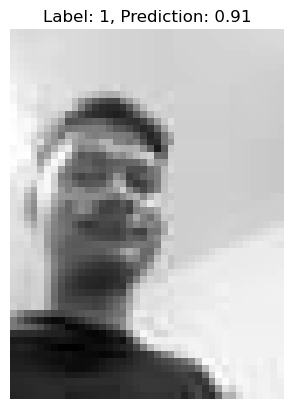

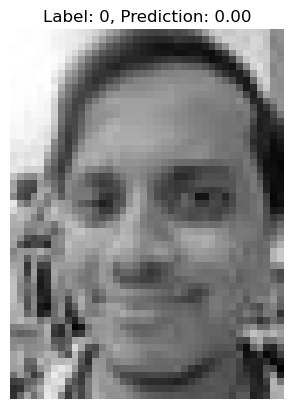

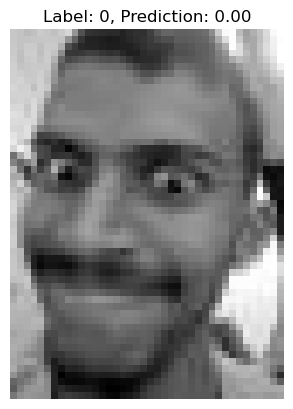

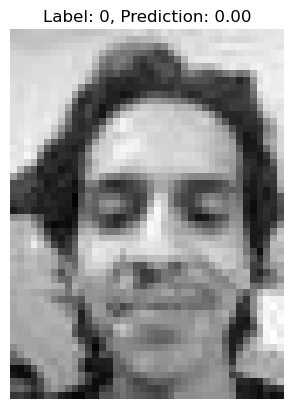

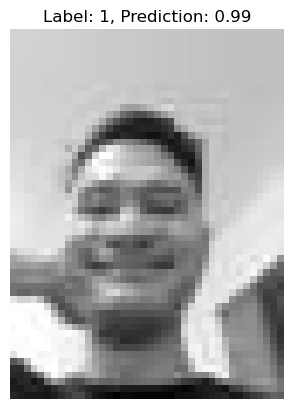

In [13]:
# Make predictions and display a few test images with their predictions
def display_image(image, label, prediction):
    image = image.numpy().squeeze()
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}, Prediction: {prediction:.2f}')
    plt.axis('off')
    plt.show()

# Show a few test images with predictions
for i in range(5):
    sample = test_dataset[i]
    image, label = sample['image'], sample['label']
    #image = image.unsqueeze(0)  # Add batch dimension
    prediction = model(image.unsqueeze(0)).item()
    display_image(image, label, prediction)


# SAVING MODEL

In [14]:
torch.save(model.state_dict(), 'CNN_statedict.pth')

# LOADING MODEL

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 10 * 13, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 10 * 13)
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [3]:
model = CNNModel()

# Load the saved state dictionary
model.load_state_dict(torch.load('CNN_statedict.pth'))

model.eval()

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8320, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

# OPENCV

In [ ]:
pip install torch torchvision opencv-python numpy

In [7]:
import cv2
import numpy as np
from torchvision import transforms

# OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Transform for the input image
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
# Real-time face detection and classification
def classify_faces(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    display(face)
    
    for (x, y, w, h) in faces:
        # Extract the face ROI
        face = gray[y:y+h, x:x+w]
        # Resize to 40x54
#         face_resized = cv2.resize(face, (40, 54))
        face_resized = cv2.resize(face, (54, 40))
        # Normalize and transform the face
        face_transformed = transform(face_resized).unsqueeze(0)
        
        # Make a prediction
        output = model(face_transformed)
        prediction = output.item()
#         print(prediction*100)
        
        # Display the result
        label = 'Bishal' if prediction > 0.5 else 'Unknown'
        color = (0, 255, 0) if label == 'Face' else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    return frame

In [ ]:
# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Classify faces in the frame
    frame = classify_faces(frame)
    
    # Display the resulting frame
    cv2.imshow('Face Detection and Classification', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
# OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Transform for the input image
transform = transforms.Compose([transforms.ToTensor()])

# Directories to save images
bishal = 'detected_faces/bishal'
unknown = 'detected_faces/unknown'

# Create directories if they don't exist
os.makedirs(bishal, exist_ok=True)
os.makedirs(unknown, exist_ok=True)

# Real-time face detection and saving images
def save_faces(frame, frame_count):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(80, 80))
    
    for (x, y, w, h) in faces:
        # Extract the face ROI
        face = gray[y:y+h, x:x+w]
        # Resize to 40x54
        face_resized = cv2.resize(face, (40, 54))
        # Normalize and transform the face
        face_transformed = transform(face_resized).unsqueeze(0)
        
        # Make a prediction
        output = model(face_transformed)
        prediction = output.item()
        
        # Determine label and save the face image
        label = 'Bishal' if prediction > 0.5 else 'Unknown'
        save_dir = bishal if label == 'Bishal' else unknown
        file_path = os.path.join(save_dir, f'{label}_{frame_count}.png')
        
        # Save the image
        cv2.imwrite(file_path, face_resized * 255)

# Capture video from webcam
cap = cv2.VideoCapture(0)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Save faces in the frame
    save_faces(frame, frame_count)
    frame_count += 1
    
    # Display the resulting frame
    cv2.imshow('Real-Time Face Detection', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# FACENET

In [ ]:
pip install torch torchvision opencv-python numpy facenet-pytorch

In [11]:
import cv2
import torch
import numpy as np
from torchvision import transforms
import torch.nn as nn
from facenet_pytorch import MTCNN
import os

mtcnn = MTCNN(keep_all=True)

transform = transforms.Compose([transforms.ToTensor()])

face_dir = 'detected_faces/face'
not_face_dir = 'detected_faces/not_face'

os.makedirs(face_dir, exist_ok=True)
os.makedirs(not_face_dir, exist_ok=True)

def save_faces(frame, frame_count):
    boxes, _ = mtcnn.detect(frame)
    
    if boxes is not None:
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            face = frame[y1:y2, x1:x2]
            face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            face_resized = cv2.resize(face_gray, (40, 54))
            face_transformed = transform(face_resized).unsqueeze(0)
            output = model(face_transformed)
            prediction = output.item()
            display(prediction)

            label = 'Face' if prediction > 0.8 else 'Not Face'
            save_dir = face_dir if label == 'Face' else not_face_dir
            file_path = os.path.join(save_dir, f'{label}_{frame_count}_{i}.png')
            
            cv2.imwrite(file_path, face_resized * 255)

cap = cv2.VideoCapture(0)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    save_faces(frame, frame_count)
    frame_count += 1
    
    cv2.imshow('Real-Time Face Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

0.03966084495186806

0.5346702933311462

0.9249355792999268

0.9094635248184204

0.9197985529899597

0.9249398708343506

0.851161539554596

0.9042293429374695

0.8946604132652283

0.8861944079399109

0.9540584683418274

0.9374408721923828

0.9408433437347412

0.8795914053916931

0.8924750685691833

0.8797010779380798

0.9197725653648376

0.9524493217468262

0.9769263863563538

0.9728826880455017

0.9709528088569641

0.9267271161079407

0.9735841155052185

0.01285554002970457

0.9769886136054993

0.9298893213272095

0.9651216864585876

0.974502682685852

0.8611366152763367

0.8693707585334778

0.8892991542816162

In [ ]:
import cv2
import torch
import numpy as np
from torchvision import transforms
import torch.nn as nn
from facenet_pytorch import MTCNN

mtcnn = MTCNN(keep_all=True)

transform = transforms.Compose([transforms.ToTensor()])

def classify_faces(frame):
    boxes, _ = mtcnn.detect(frame)
    
    if boxes is not None:
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            face = frame[y1:y2, x1:x2]
            face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            # Resize to 40x54
            face_resized = cv2.resize(face_gray, (40, 54))
            face_transformed = transform(face_resized).unsqueeze(0)
    
            output = model(face_transformed)
            prediction = output.item()
            
            label = 'Bishal' if prediction > 0.92 else 'Unknown'
            color = (0, 255, 0) if label == 'Bishal' else (0, 0, 255)
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    return frame

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = classify_faces(frame)
    
    cv2.imshow('Real-Time Face Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()